# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [5]:
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [7]:
data.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0         32.0     13          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0      NaN  Санкт-Петербург           18863.0   
1          11.0      2.0   посёлок Шушары           12817.0   
2           8.3      0.0  Санкт-Петербург           21741.0   
3           NaN      0.0  Санкт-Петербург           28098.0   
4          41.0      NaN  Санкт-Петербург           31856.0   

  cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0             16028.0               1.0          482.0               2.0   
1             18603.0               0.0            NaN               0.0   
2             13933.0               1.0           90.0               2.0   
3              6800.0               2.0           84.0               3.0   
4              8098.0               2.0          112.0               1.0   

   ponds_nearest  days_exposition  
0          755.0              NaN  
1            NaN             81.0  
2          574.0            558.0  
3          234.0            424.0  
4           48.0            121.0  

[5 rows x 22 columns]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [9]:
data.describe(include = "all").T

count unique                  top   freq  \
total_images          23699.0    NaN                  NaN    NaN   
last_price            23699.0    NaN                  NaN    NaN   
total_area            23699.0    NaN                  NaN    NaN   
first_day_exposition    23699   1491  2018-02-01T00:00:00    368   
rooms                 23699.0    NaN                  NaN    NaN   
ceiling_height        14504.0    NaN                  NaN    NaN   
floors_total          23613.0    NaN                  NaN    NaN   
living_area           21796.0    NaN                  NaN    NaN   
floor                 23699.0    NaN                  NaN    NaN   
is_apartment             2775      2                False   2725   
studio                  23699      2                False  23550   
open_plan               23699      2                False  23632   
kitchen_area          21421.0    NaN                  NaN    NaN   
balcony               12180.0    NaN                  NaN    NaN   
locality_name           23650    364      Санкт-Петербург  15721   
airports_nearest      18157.0    NaN                  NaN    NaN   
cityCenters_nearest   18180.0    NaN                  NaN    NaN   
parks_around3000      18181.0    NaN                  NaN    NaN   
parks_nearest          8079.0    NaN                  NaN    NaN   
ponds_around3000      18181.0    NaN                  NaN    NaN   
ponds_nearest          9110.0    NaN                  NaN    NaN   
days_exposition       20518.0    NaN                  NaN    NaN   

                                mean              std      min        25%  \
total_images                9.858475         5.682529      0.0        6.0   
last_price            6541548.771552  10887013.267545  12190.0  3400000.0   
total_area                 60.348651        35.654083     12.0       40.0   
first_day_exposition             NaN              NaN      NaN        NaN   
rooms                       2.070636         1.078405      0.0        1.0   
ceiling_height              2.771499         1.261056      1.0       2.52   
floors_total               10.673824         6.597173      1.0        5.0   
living_area                34.457852        22.030445      2.0       18.6   
floor                       5.892358         4.885249      1.0        2.0   
is_apartment                     NaN              NaN      NaN        NaN   
studio                           NaN              NaN      NaN        NaN   
open_plan                        NaN              NaN      NaN        NaN   
kitchen_area               10.569807         5.905438      1.3        7.0   
balcony                     1.150082           1.0713      0.0        0.0   
locality_name                    NaN              NaN      NaN        NaN   
airports_nearest        28793.672193     12630.880622      0.0    18585.0   
cityCenters_nearest     14191.277833       8608.38621    181.0     9238.0   
parks_around3000            0.611408         0.802074      0.0        0.0   
parks_nearest             490.804555       342.317995      1.0      288.0   
ponds_around3000            0.770255         0.938346      0.0        0.0   
ponds_nearest               517.9809       277.720643     13.0      294.0   
days_exposition           180.888634       219.727988      1.0       45.0   

                            50%        75%          max  
total_images                9.0       14.0         50.0  
last_price            4650000.0  6800000.0  763000000.0  
total_area                 52.0       69.9        900.0  
first_day_exposition        NaN        NaN          NaN  
rooms                       2.0        3.0         19.0  
ceiling_height             2.65        2.8        100.0  
floors_total                9.0       16.0         60.0  
living_area                30.0       42.3        409.7  
floor                       4.0        8.0         33.0  
is_apartment                NaN        NaN          NaN  
studio                      NaN        NaN       

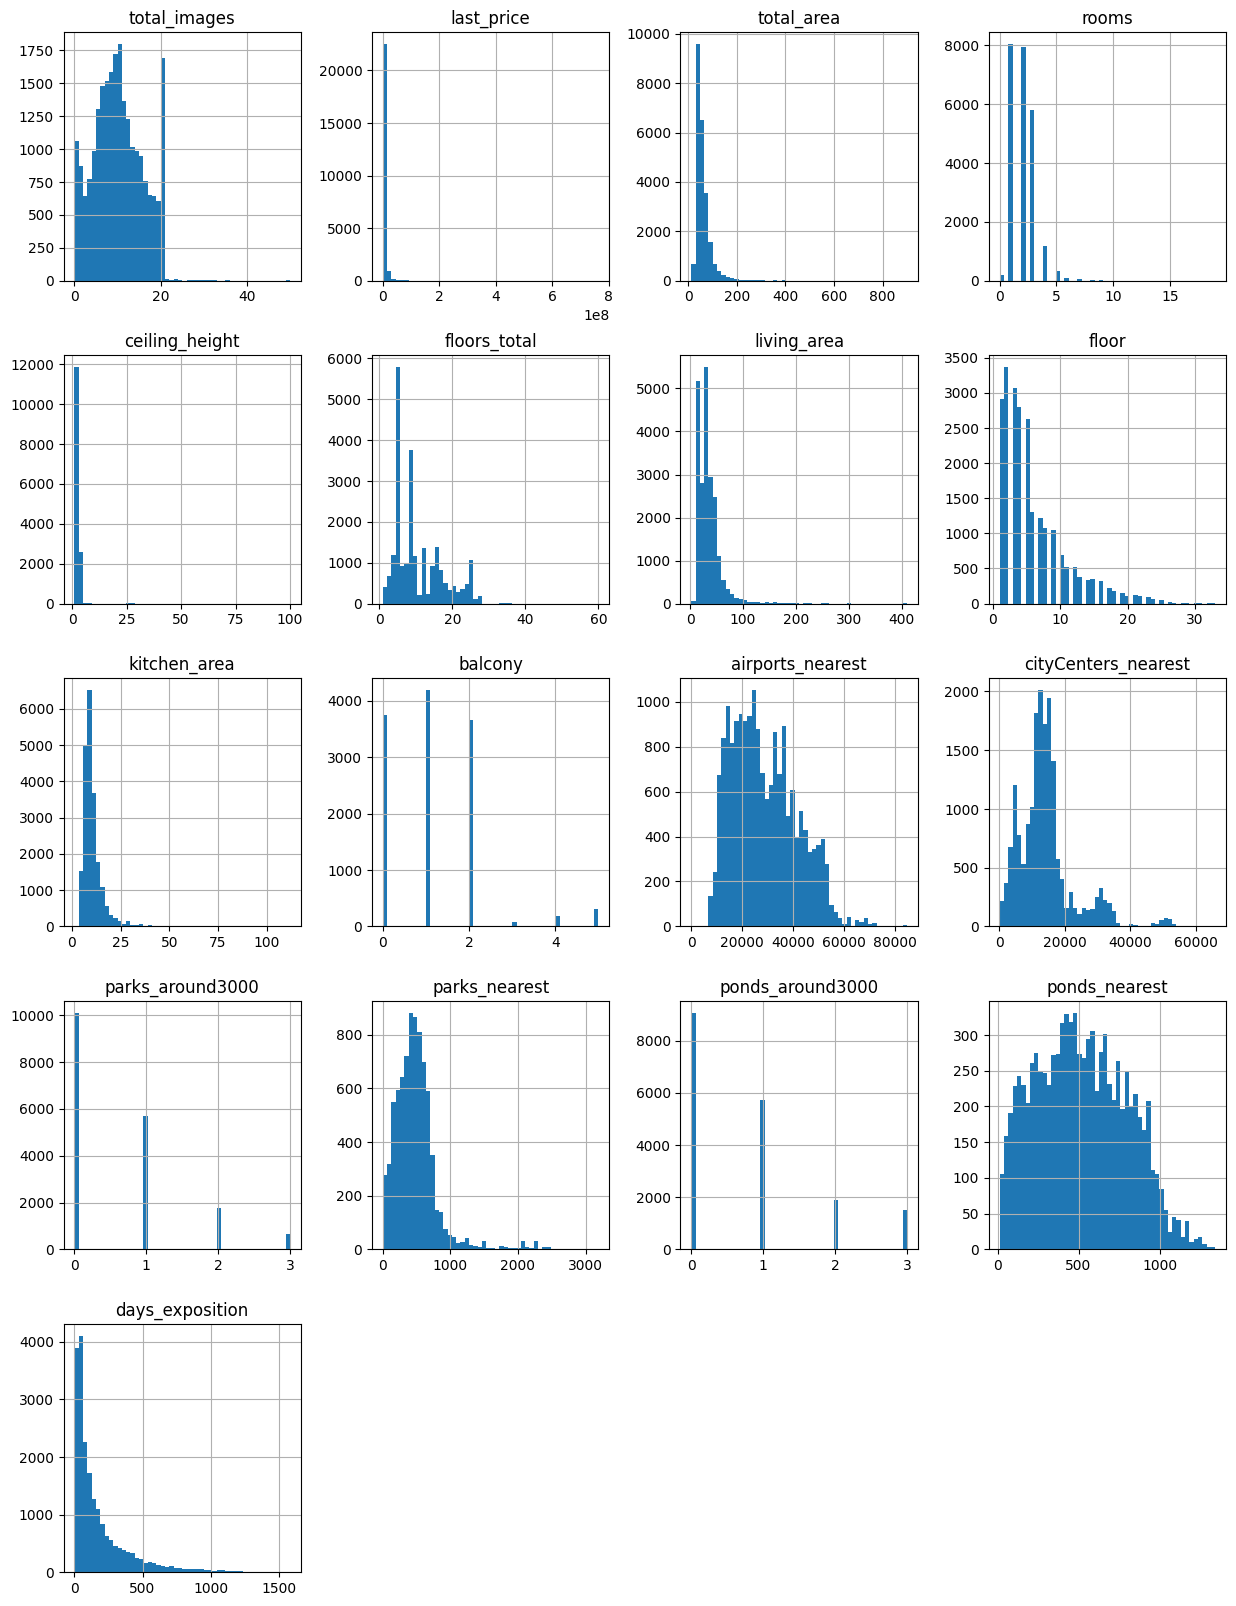

In [10]:
data.hist(figsize=(15, 20), bins=50);

Из особенностей полученных данных можем отметить большое количество пропущенных значений

### Предобработка данных

#### Изучим пропущенные значения в столбцах

Переведем стоимость в тыс.рублей

In [11]:
data['last_price'] = (data['last_price'] / 1e3).round(2)

выполним проверку на дублирующиеся строки:

In [12]:
data.duplicated().sum()

0

Выведем количество пропущенных значений для каждого столбца.

In [13]:
data.isna().sum().sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

Представим NaN в более удобном виде (%):

In [14]:
(data.isna().mean().sort_values(ascending=False) * 100).round(2)

is_apartment            88.29
parks_nearest           65.91
ponds_nearest           61.56
balcony                 48.61
ceiling_height          38.80
airports_nearest        23.38
cityCenters_nearest     23.29
ponds_around3000        23.28
parks_around3000        23.28
days_exposition         13.42
kitchen_area             9.61
living_area              8.03
floors_total             0.36
locality_name            0.21
total_images             0.00
last_price               0.00
studio                   0.00
floor                    0.00
rooms                    0.00
first_day_exposition     0.00
total_area               0.00
open_plan                0.00
dtype: float64

Пропусков в данных довольно много

Признак `is_apartment` важный признак для ценообразования, вероятно подавляющее большинство пропущенных значений должны иметь признак `False`. Обоснование: Апартаментов на рынке намного меньше чем квартир, продавцы квартир редко заполняли этот признак, считая его не важным в их случае. Заменим пропуски на `False`.

In [15]:
data['is_apartment'].fillna(value=False, inplace=True)

Пропуски в столбцах floors_total и locality_name не превышают 0,5%, мы можем удалить такие строки

In [16]:
data.dropna(subset=['floors_total', 'locality_name'], inplace=True)

Строки с остальными пропусками оставим, корректно их заполнить затруднительно.

#### Рассмотрим типы данных в каждом столбце

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        14481 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               12090 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest      18

Изменим формат столбца first_day_exposition на datetime:

In [18]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Изменим тип с float на int у следующих столбцов: 'balcony', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition'.

In [19]:
columns = ['balcony', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition']
for col in columns:
    data[col] = data[col].astype('Int64', errors='ignore')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony              

остальные столбцы оставим без изменений

#### Изучем уникальные значения в столбце с названиями населенных пунктов и устраним неявные дубликаты

Выведем количество уникальных значений:

In [21]:
len(data['locality_name'].unique())

364

Проверим на дубликаты по регистру:

In [22]:
len(data['locality_name'].str.lower().unique())

364

Проверим на дубликаты по лишним пробелам:

In [23]:
data['locality_name'] = data['locality_name'].str.replace(' {2,}', ' ', regex=True)
data['locality_name'] = data['locality_name'].str.strip()

In [24]:
len(data['locality_name'].unique())

364

Поищем дубликаты вручную:

In [25]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [26]:
data['locality_name'] = data['locality_name'].str.replace('посёлок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('село ', 'поселок ')
data['locality_name'] = data['locality_name'].str.replace('коттеджный поселок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок при железнодорожной станции', 'поселок станции')

In [27]:
len(data['locality_name'].unique())

318

In [28]:
data.shape[0]

23565

Итого удалили 46 дубликатов

#### Проверим и устраним редкие и выбивающиеся значения.

Создадим вспомогательные функции:

In [29]:
def anomalies (df, col, bins = 50):
    plt.subplot(1, 2, 1)
    ax = df[col].plot(kind='hist', bins=bins)
    ax.set_xlabel('dimension', fontsize=14)
    ax.set_ylabel('number of observations', fontsize=14)
    ax.set_title(f"histogram by column '{col}'", fontsize=14)

    #  включим второстепенные деления осей:
    ax.minorticks_on()

    #  Определяем внешний вид линий основной сетки:
    ax.grid(which='major',
        linestyle='-',    
           )

    #  Определяем внешний вид линий вспомогательной сетки:
    ax.grid(which='minor', 
        linestyle = ':')
    
    plt.subplot(1, 2, 2)
    bx = df.boxplot(column=col)
    bx.set_ylabel("dimension", fontsize=14)
    bx.set_title(f"boxplot by column '{col}'", fontsize=14)
    
    plt.subplots_adjust(hspace = 1, wspace=0.1, top=1, bottom=0.1, right=3)

In [30]:
def anomalies_hist (df, col, bins = 50):
    ax = df[col].plot(kind='hist', bins=bins, figsize=(15,5))
    ax.set_xlabel('dimension', fontsize=14)
    ax.set_ylabel('number of observations', fontsize=14)
    ax.set_title(f"histogram by column '{col}'", fontsize=14)

    ax.minorticks_on()

    ax.grid(which='major',
        linestyle='-')

    ax.grid(which='minor', 
        linestyle = ':')

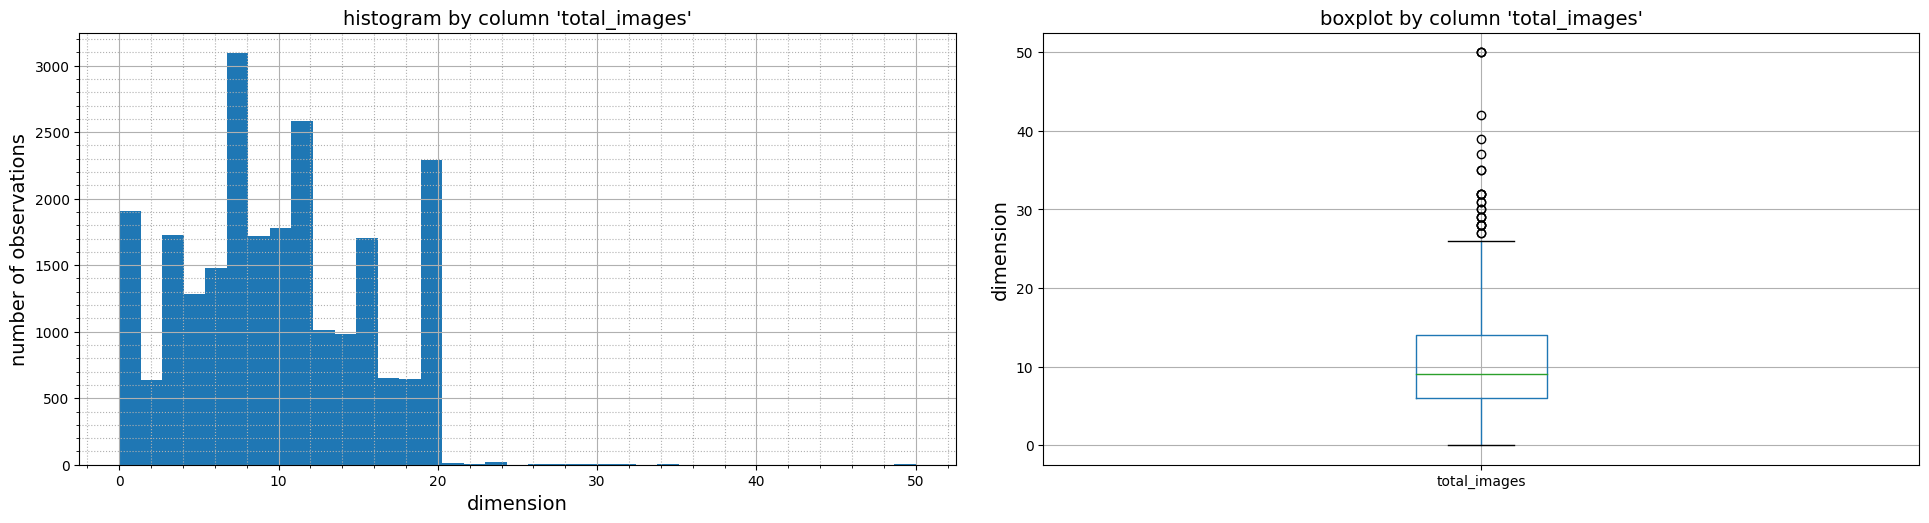

In [31]:
anomalies(data, 'total_images', bins=37)

Похоже в какой-то момент было введено ограничение на 20 фотографий

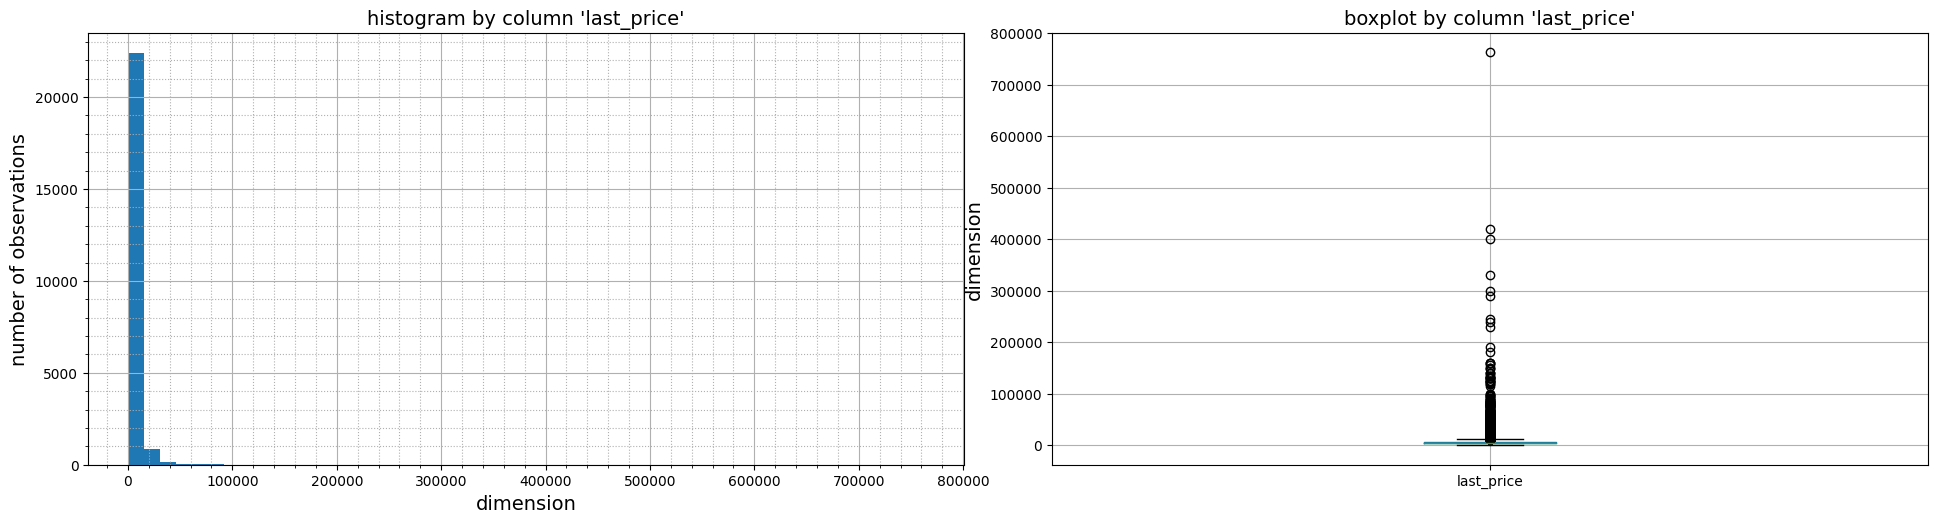

In [32]:
anomalies(data, 'last_price')

In [33]:
data['last_price'].quantile([0.005, 0.995])

0.005      800.0
0.995    55000.0
Name: last_price, dtype: float64

In [34]:
data = data.loc[data['last_price'] < 40000]

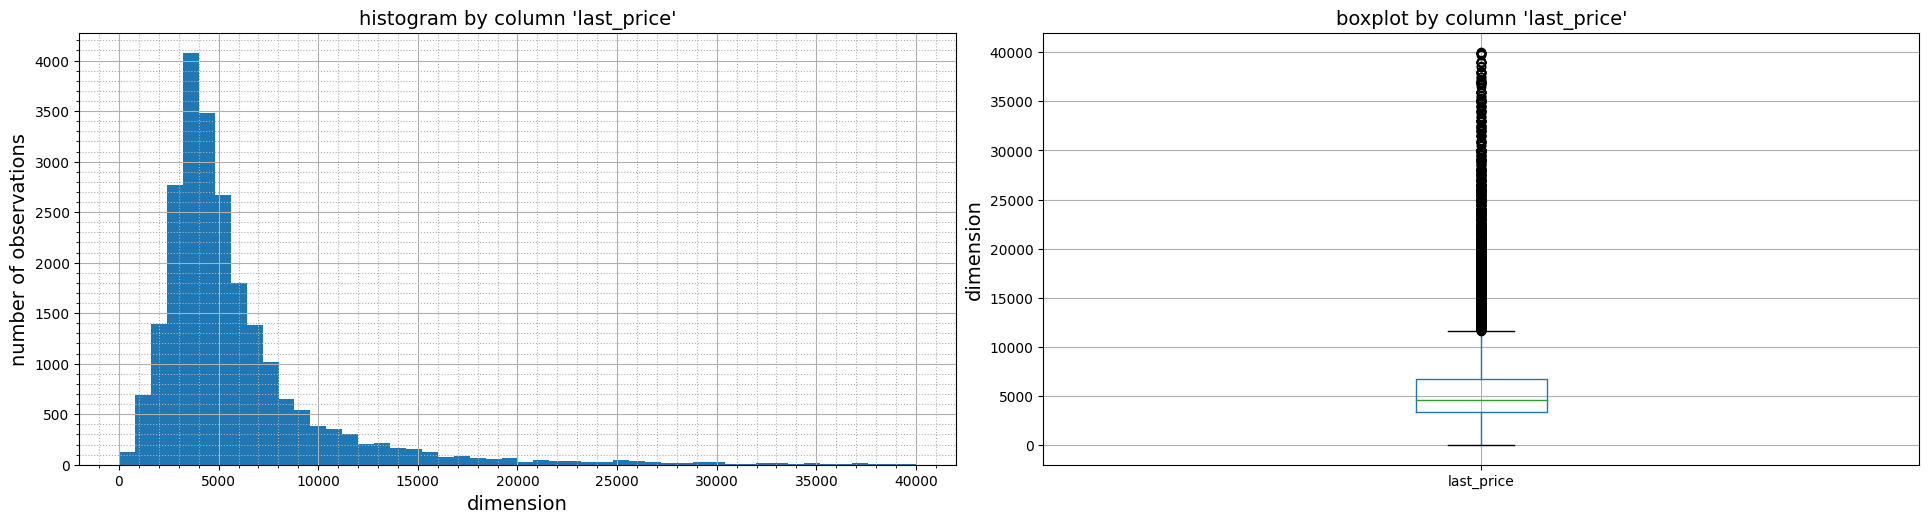

In [35]:
anomalies(data, 'last_price')

Удалили объекты стоимостью больше 40 млн.руб. Медианная цена объекта 5 млн. руб.

In [36]:
data.shape[0]

23372

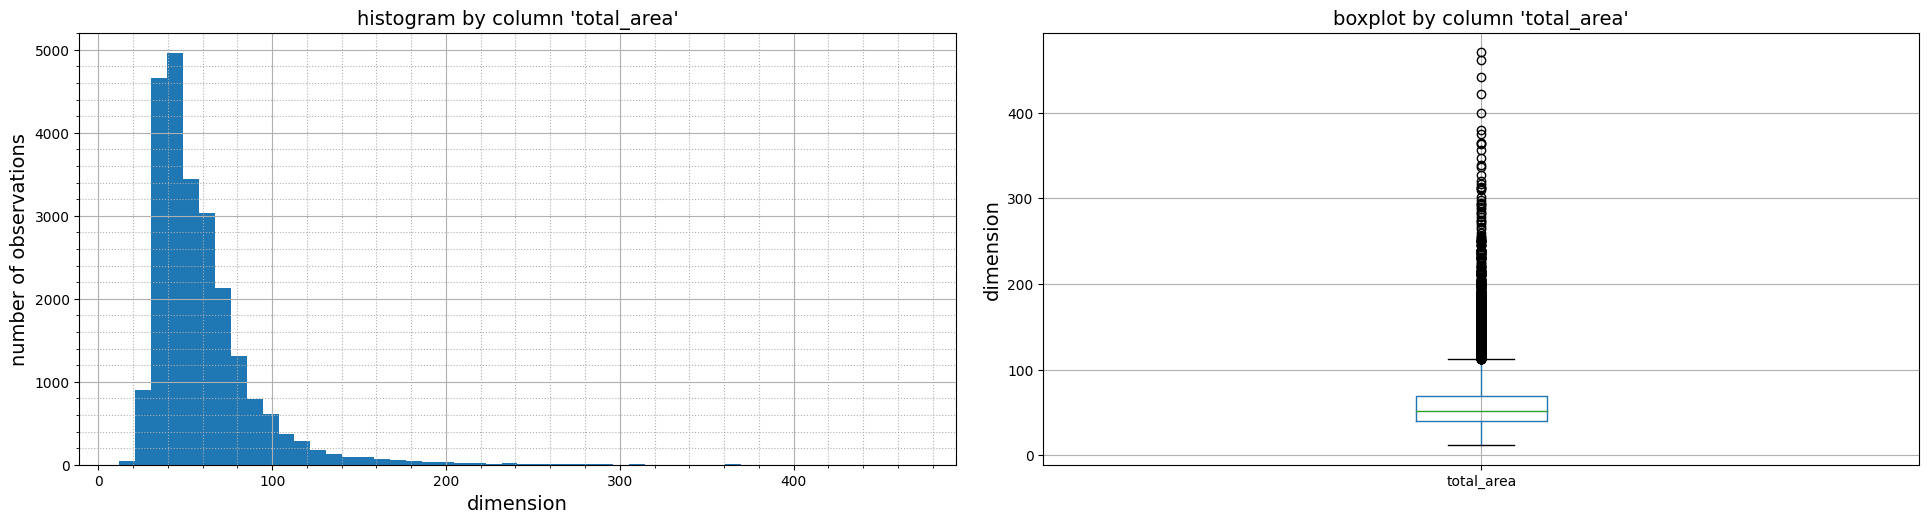

In [37]:
anomalies(data, 'total_area')

In [38]:
data = data.loc[data['total_area'] < 150]

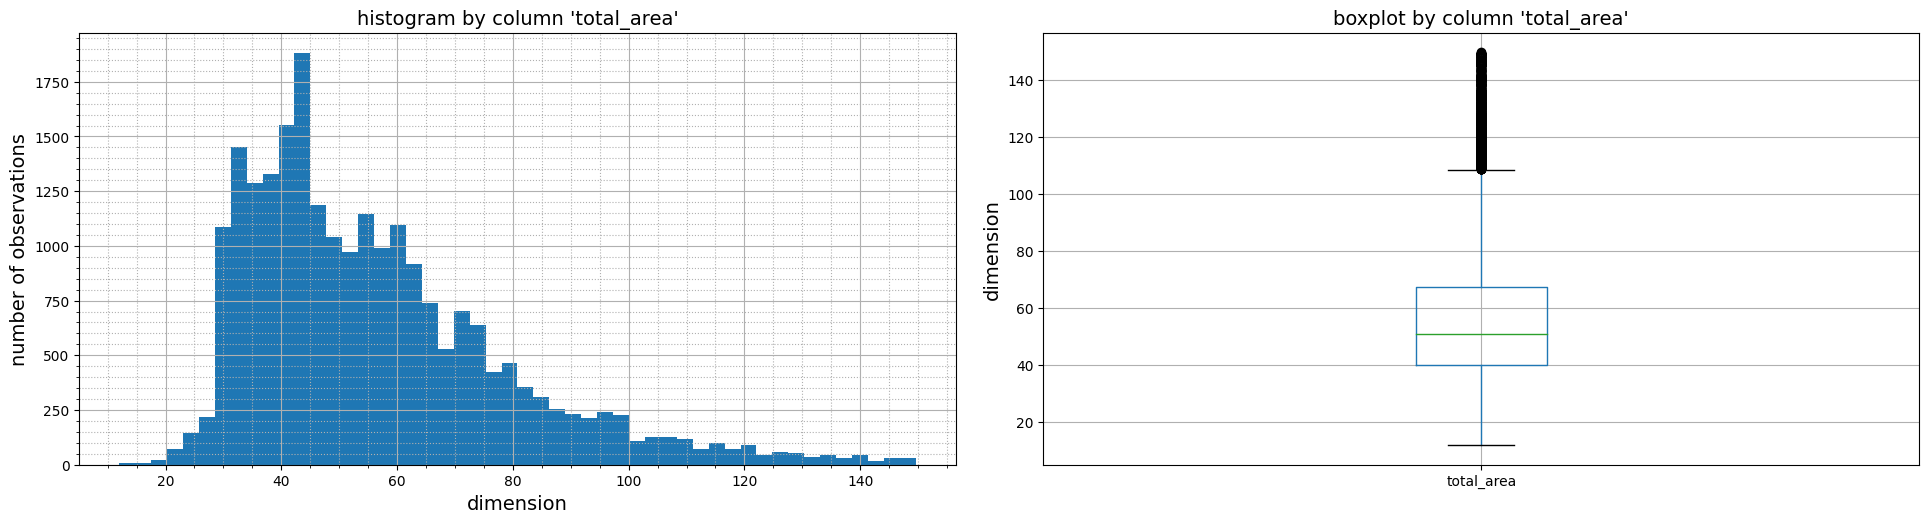

In [39]:
anomalies(data, 'total_area')

Удалили объекты общей площадью больше 150 м2. Медианная площадь объектов 50 м2.

In [40]:
data.shape[0]

22944

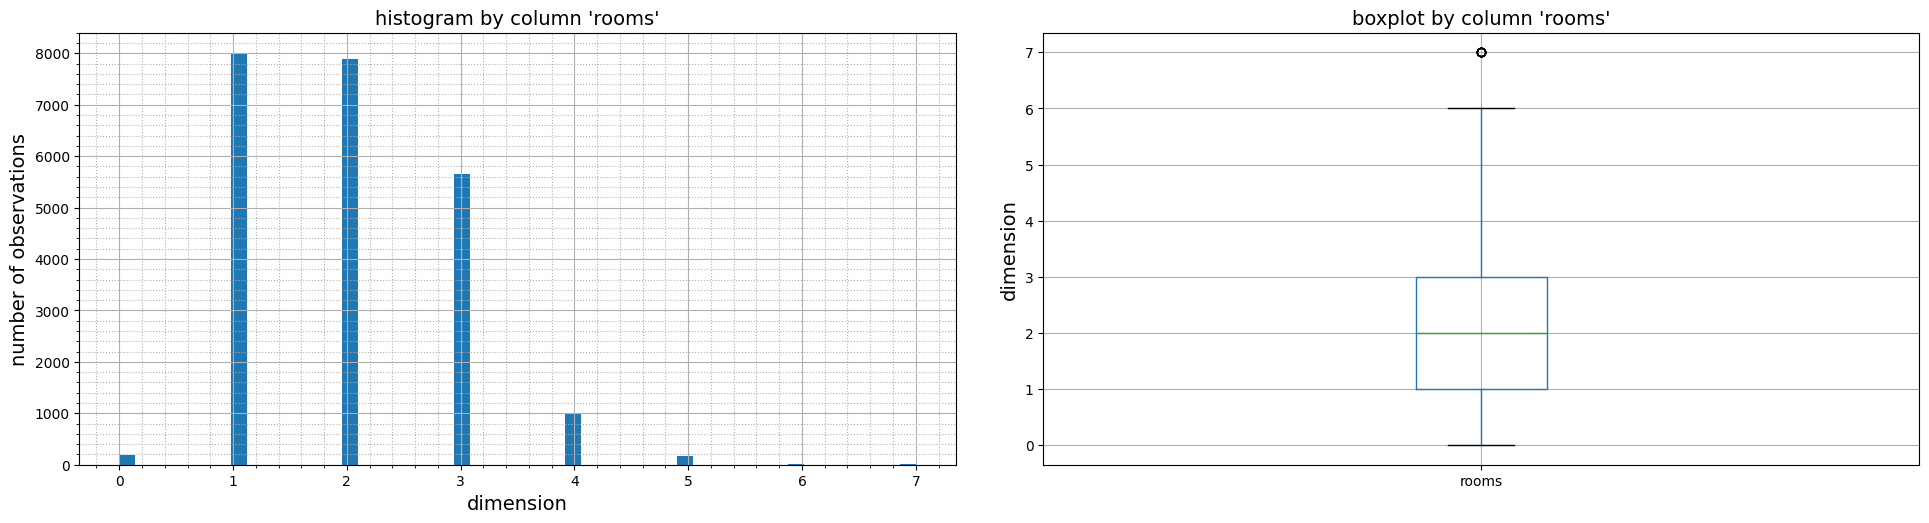

In [41]:
anomalies(data, 'rooms')

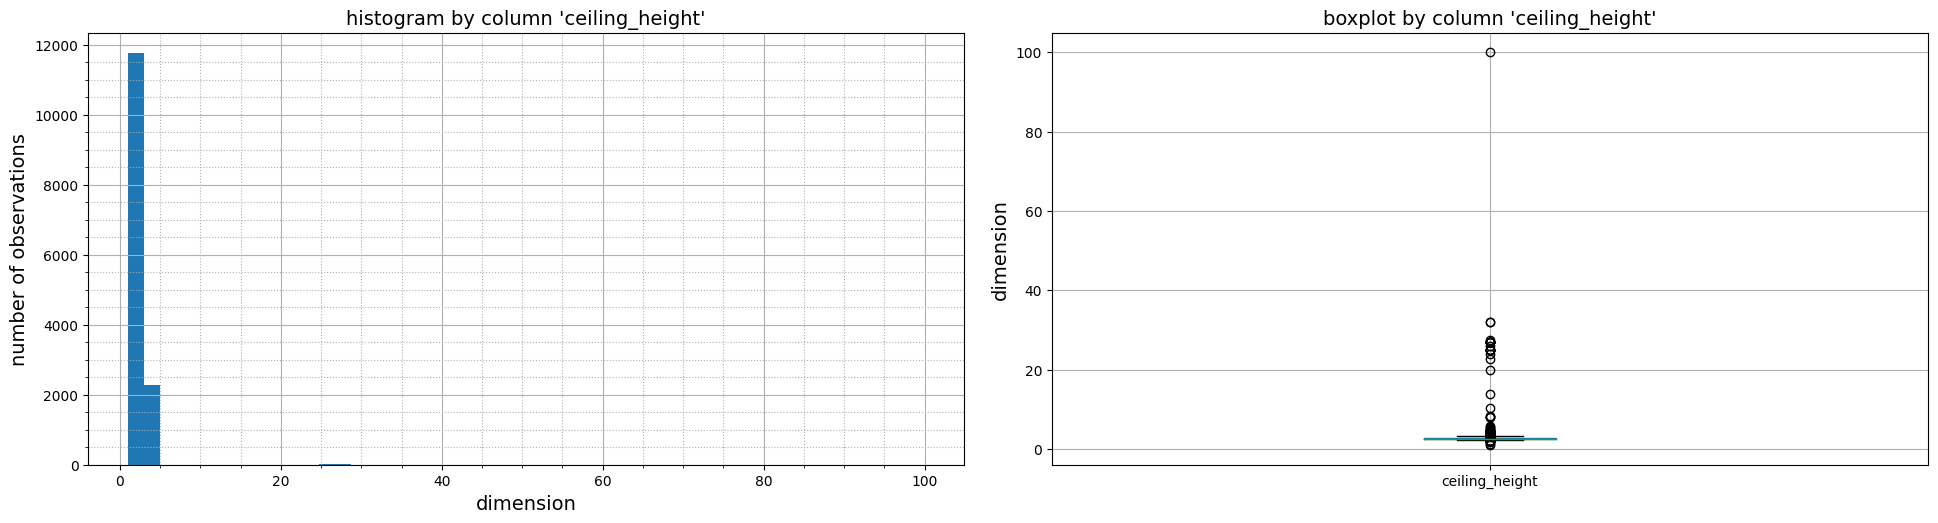

In [42]:
anomalies(data, 'ceiling_height')

<Axes: >

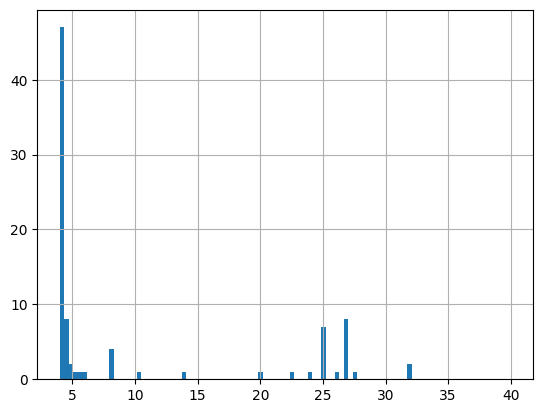

In [43]:
data['ceiling_height'].hist(bins=100, range=(4, 40))

Заменим некорректные значения высоты потолков, в которых мы предполагаем опечатку (превышающие 20 метров поделим на 10) и удалим аномалии:

In [44]:
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height']< 20, data['ceiling_height']/10)
display(data.shape[0])

22944

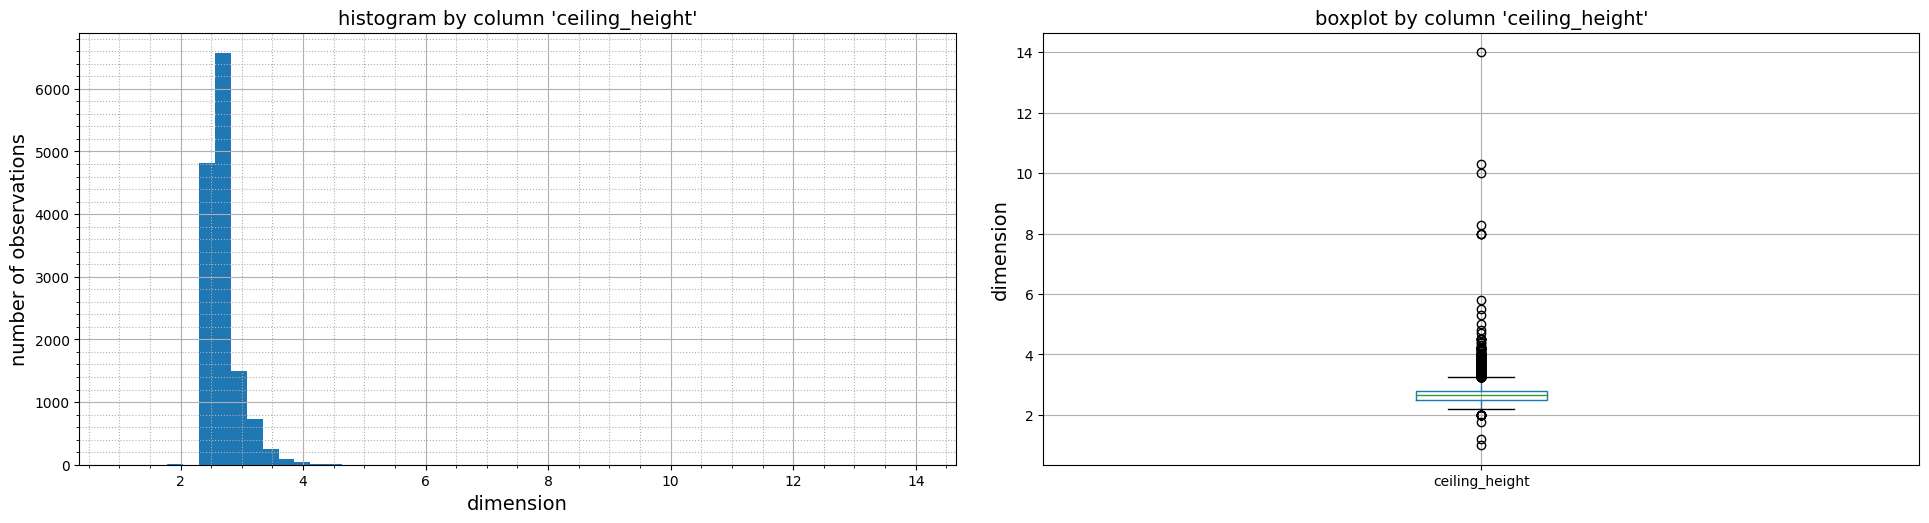

In [45]:
anomalies(data, 'ceiling_height')

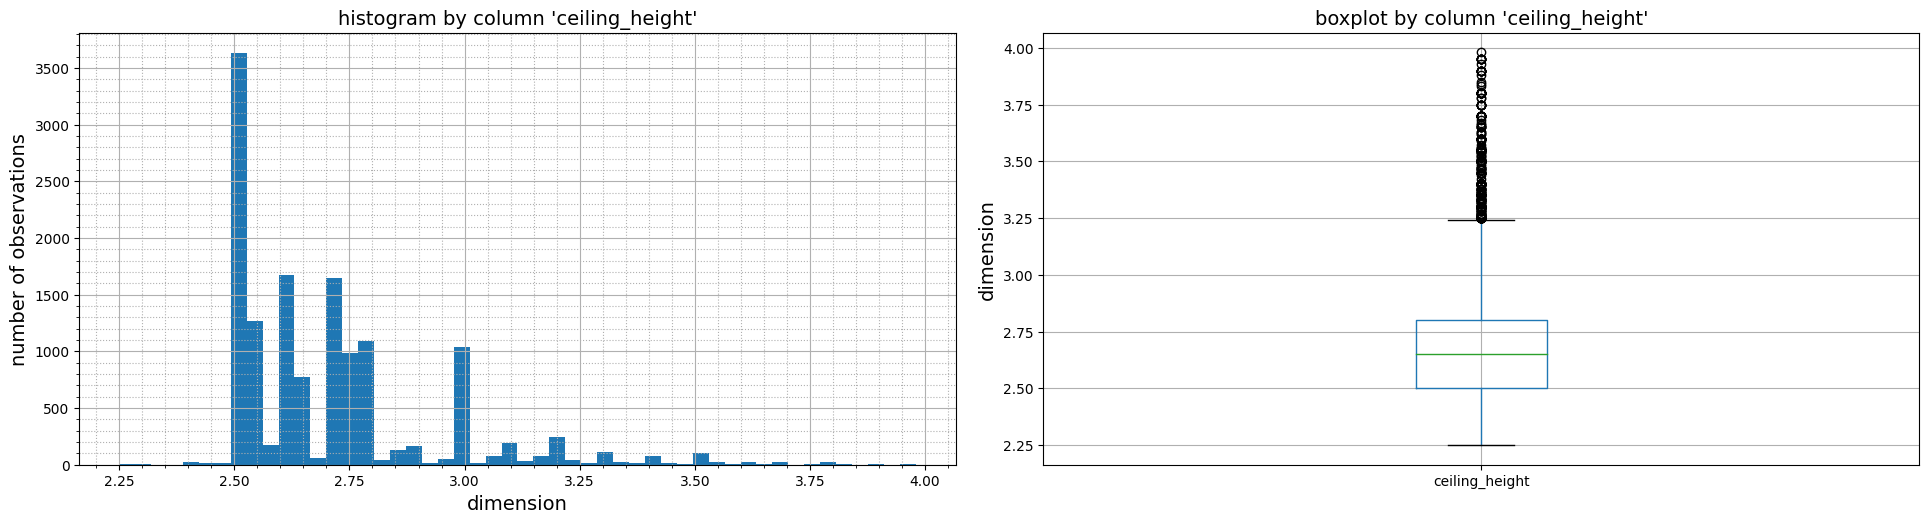

In [46]:
data = data.loc[(data['ceiling_height'] < 4) & (data['ceiling_height'] > 2.2) | (data['ceiling_height'].isna())]
anomalies(data, 'ceiling_height')

оставшиеся пропуски в этом столбце заполним медианным значением:

In [47]:
data['ceiling_height'].isna().sum()

8887

In [48]:
data['ceiling_height'].median()

2.65

In [49]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [50]:
data['ceiling_height'].median()

2.65

In [51]:
data['ceiling_height'].isna().sum()

0

In [52]:
data.shape[0]

22861

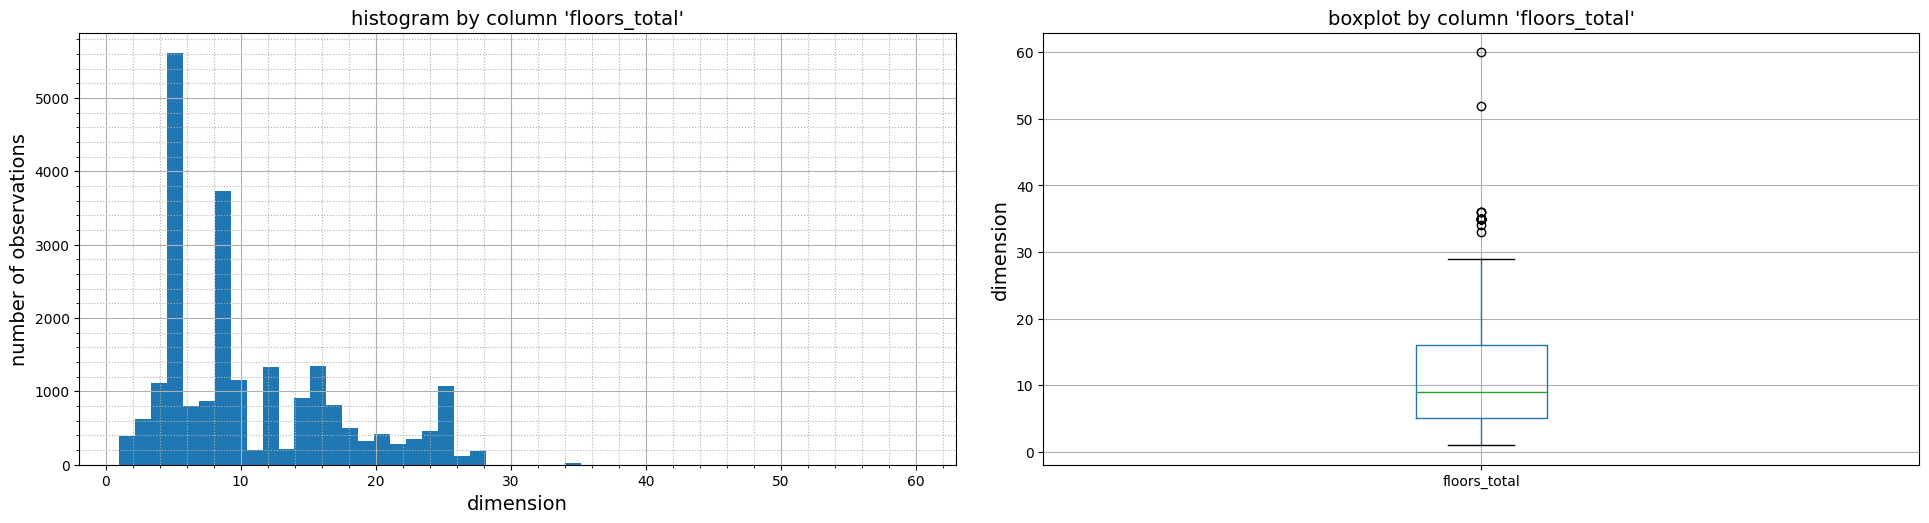

In [53]:
anomalies(data, 'floors_total')

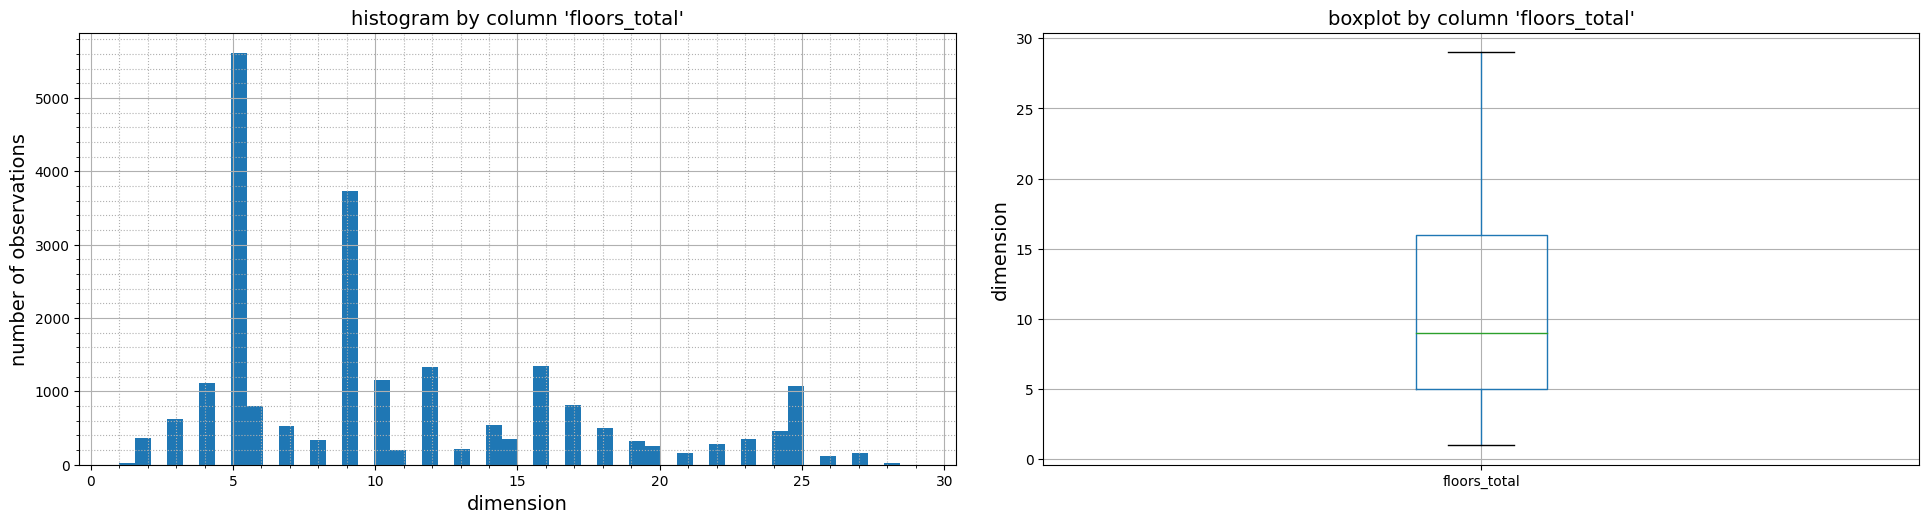

In [54]:
anomalies(data.loc[data['floors_total'] < 30], 'floors_total')

высотки не трогаем

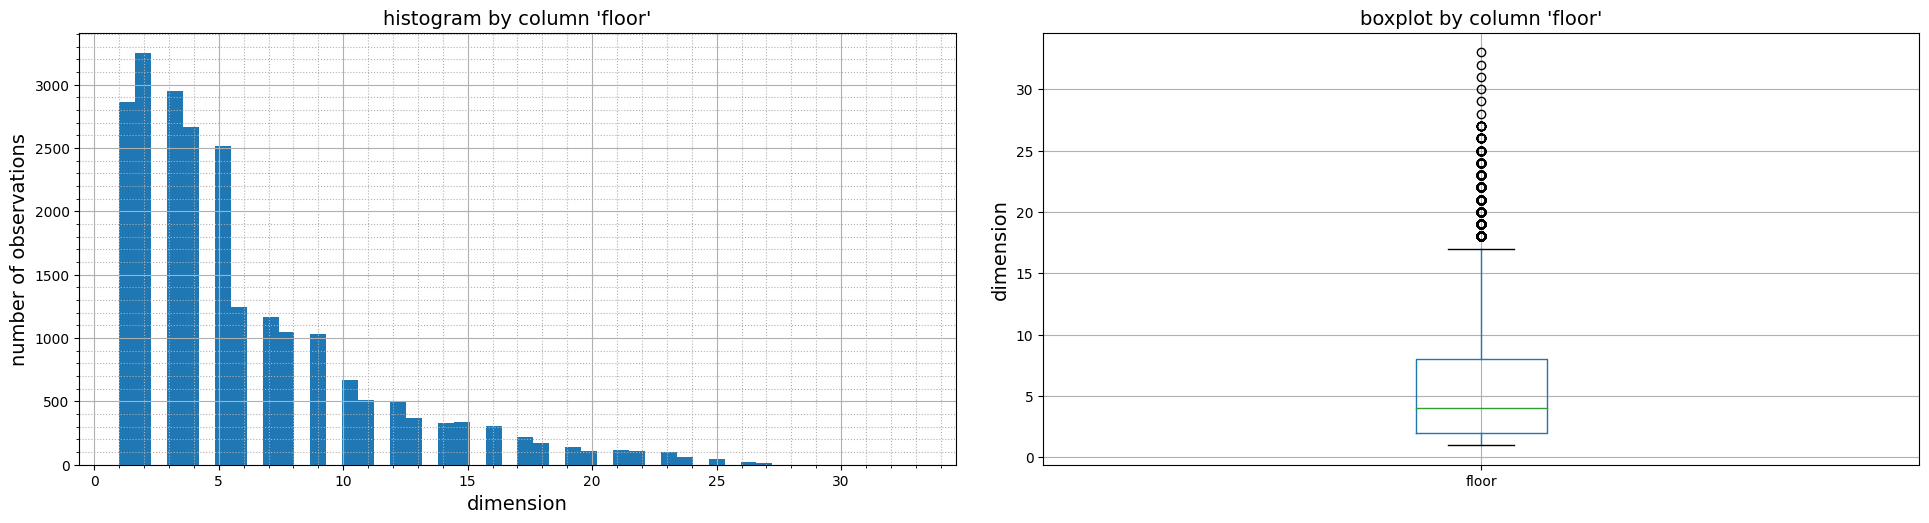

In [55]:
anomalies(data, 'floor')

In [56]:
data.shape[0]

22861

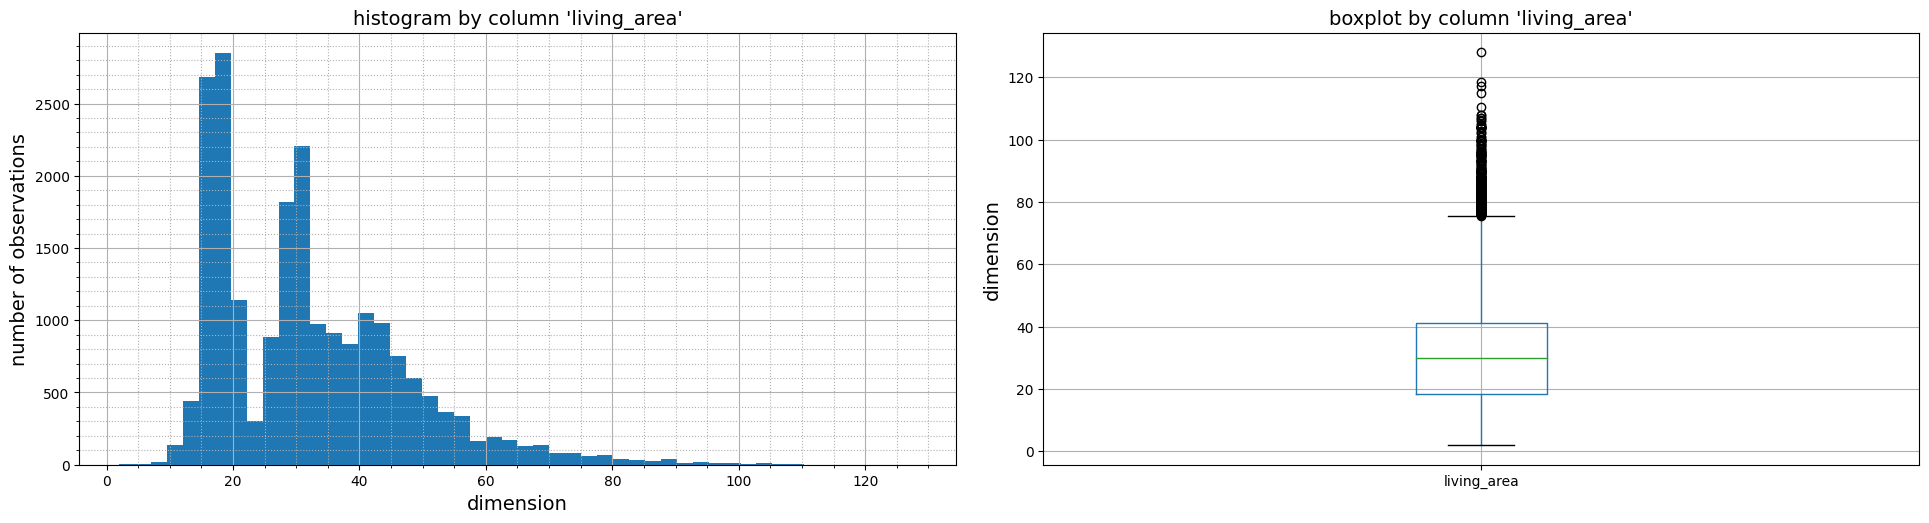

In [57]:
anomalies(data, 'living_area')

In [58]:
data = data.loc[data['living_area'] < 100]

Удалили объекты жилой площадью больше 100 м2. Медианная площадь объектов 30 м2.

Заполним пропуски соотношением медианной общей площади к медианной жилой:

In [59]:
ratio_total_living = data['total_area'].median() / data['living_area'].median()
ratio_total_living

1.7

In [60]:
data['living_area'] = data['living_area'].fillna(data['total_area'] / ratio_total_living)

In [61]:
data['living_area'].isna().sum()

0

In [62]:
data.shape[0]

21043

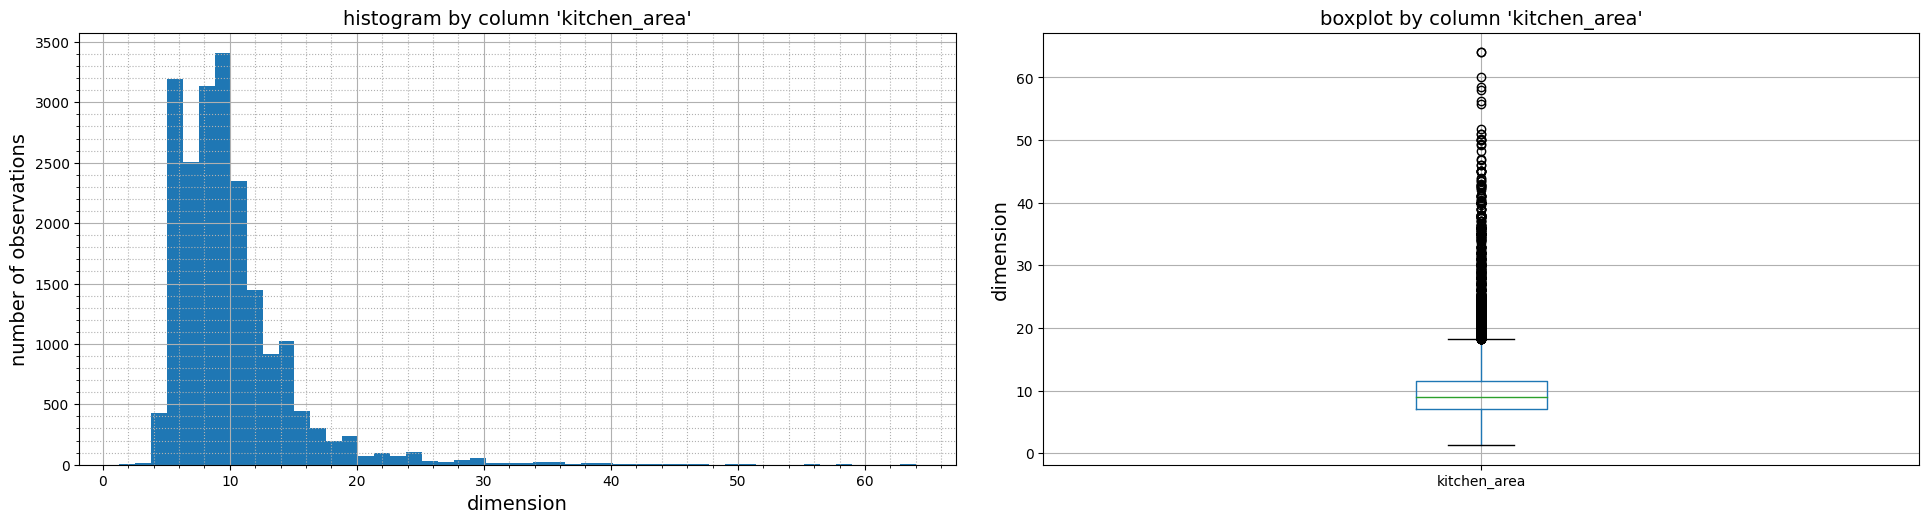

In [63]:
anomalies(data, 'kitchen_area')

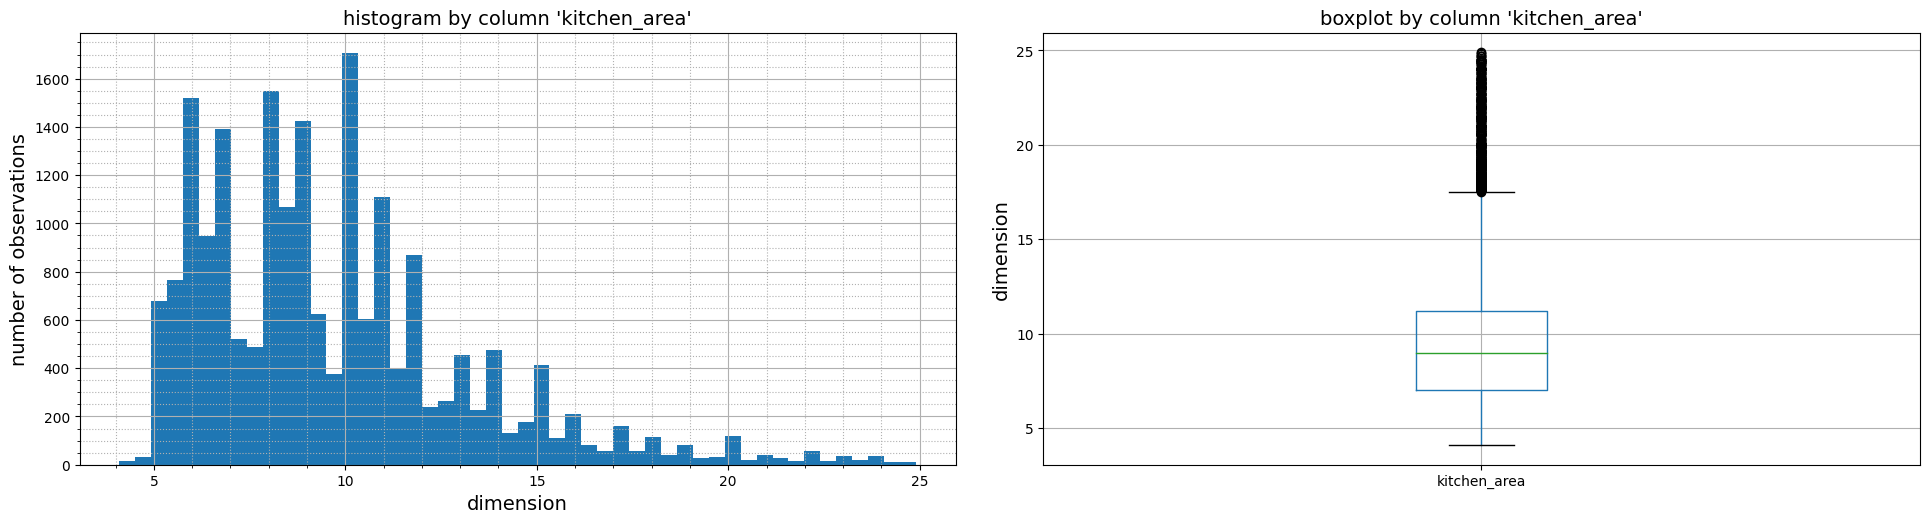

In [64]:
data = data.loc[(data['kitchen_area'] > 4) & (data['kitchen_area'] < 25)]
anomalies(data, 'kitchen_area')

Удалили объекты с площадью кухни меньше 3 и больше 25 м2. Медианная площадь объектов 9 м2.

Заполним пропуски соотношением медианной общей площади к медианной площади кухни:

In [65]:
ratio_total_kitchen = data['total_area'].median() / data['kitchen_area'].median()
ratio_total_kitchen

5.666666666666667

In [66]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] / ratio_total_kitchen)

In [67]:
data['kitchen_area'].isna().sum()

0

In [68]:
data.shape[0]

19852

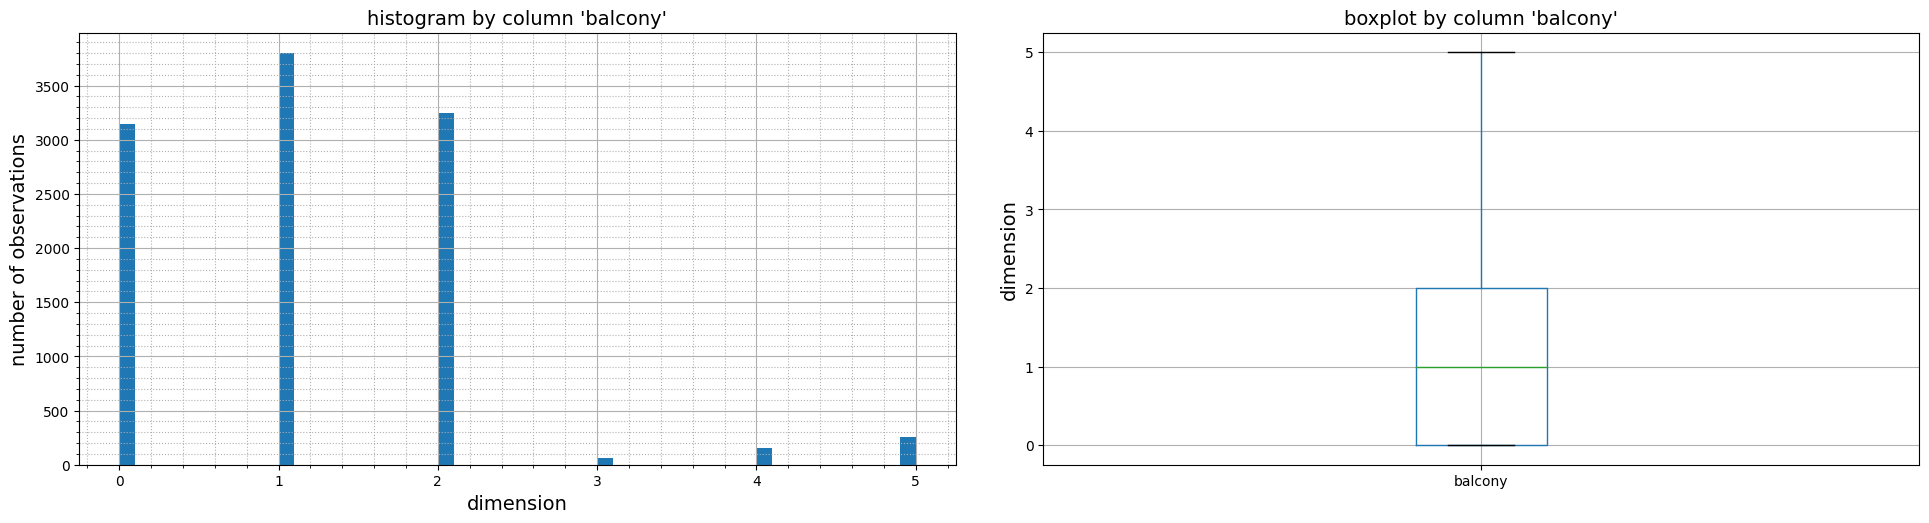

In [69]:
anomalies(data, 'balcony')

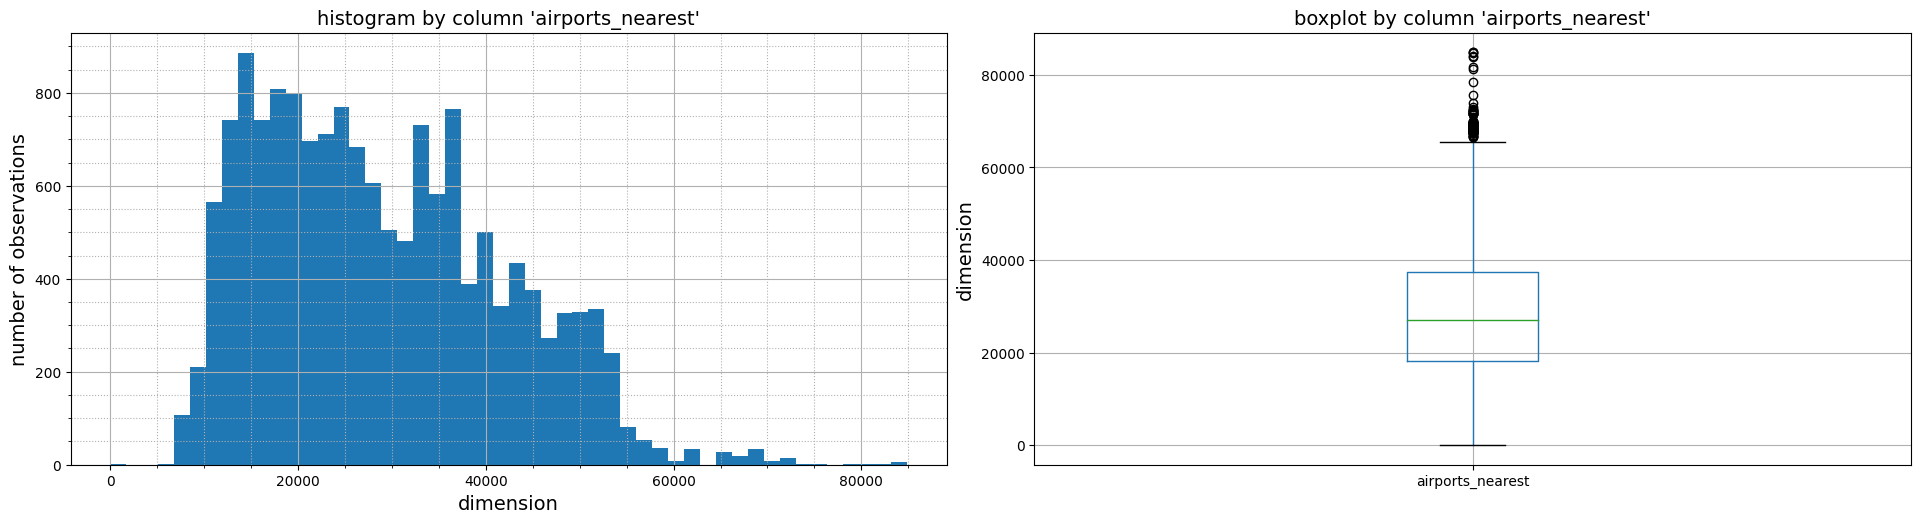

In [70]:
anomalies(data, 'airports_nearest')

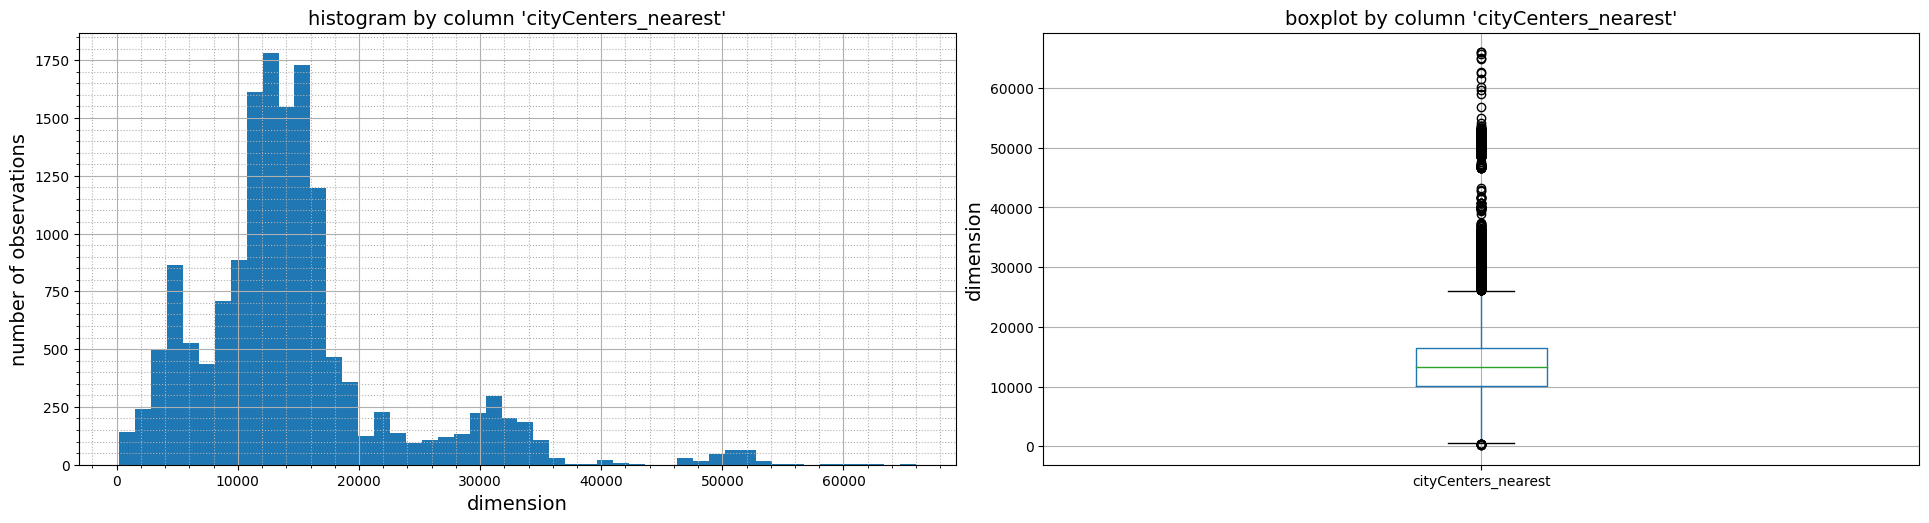

In [71]:
anomalies(data, 'cityCenters_nearest')

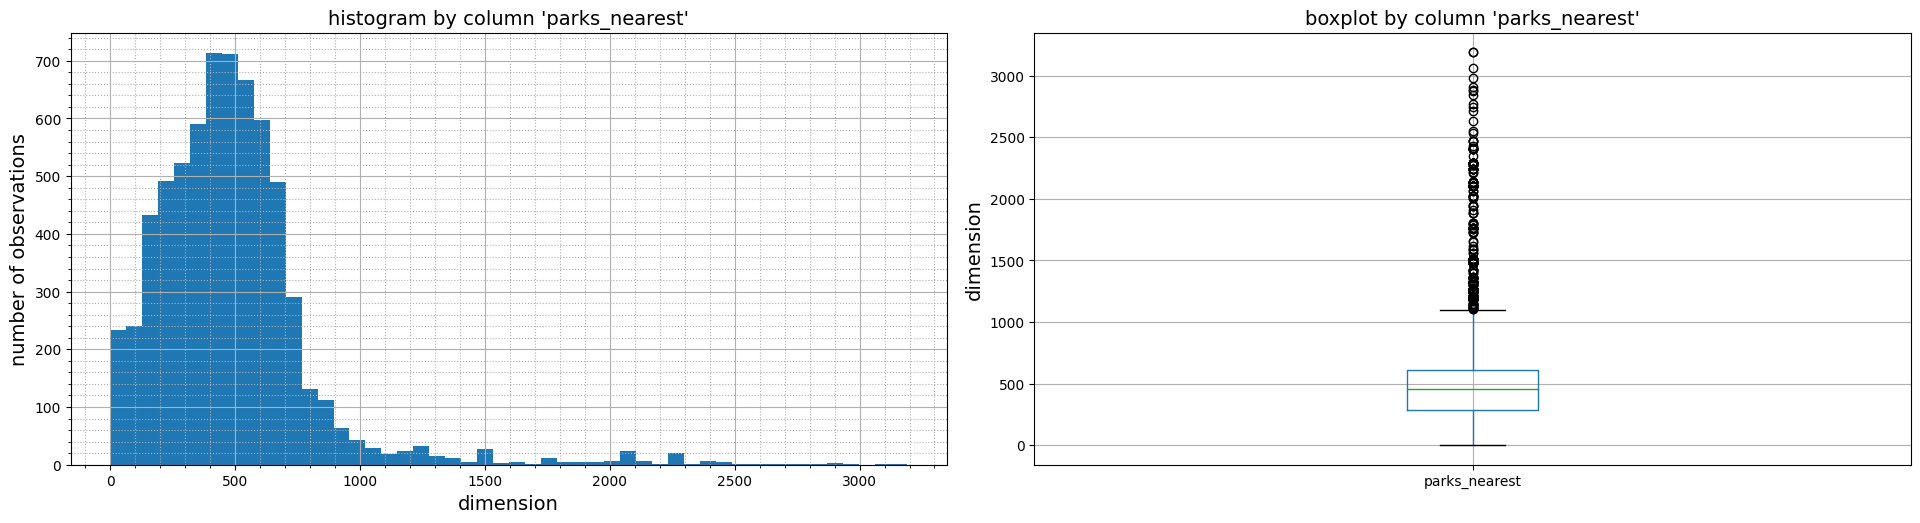

In [72]:
anomalies(data, 'parks_nearest')

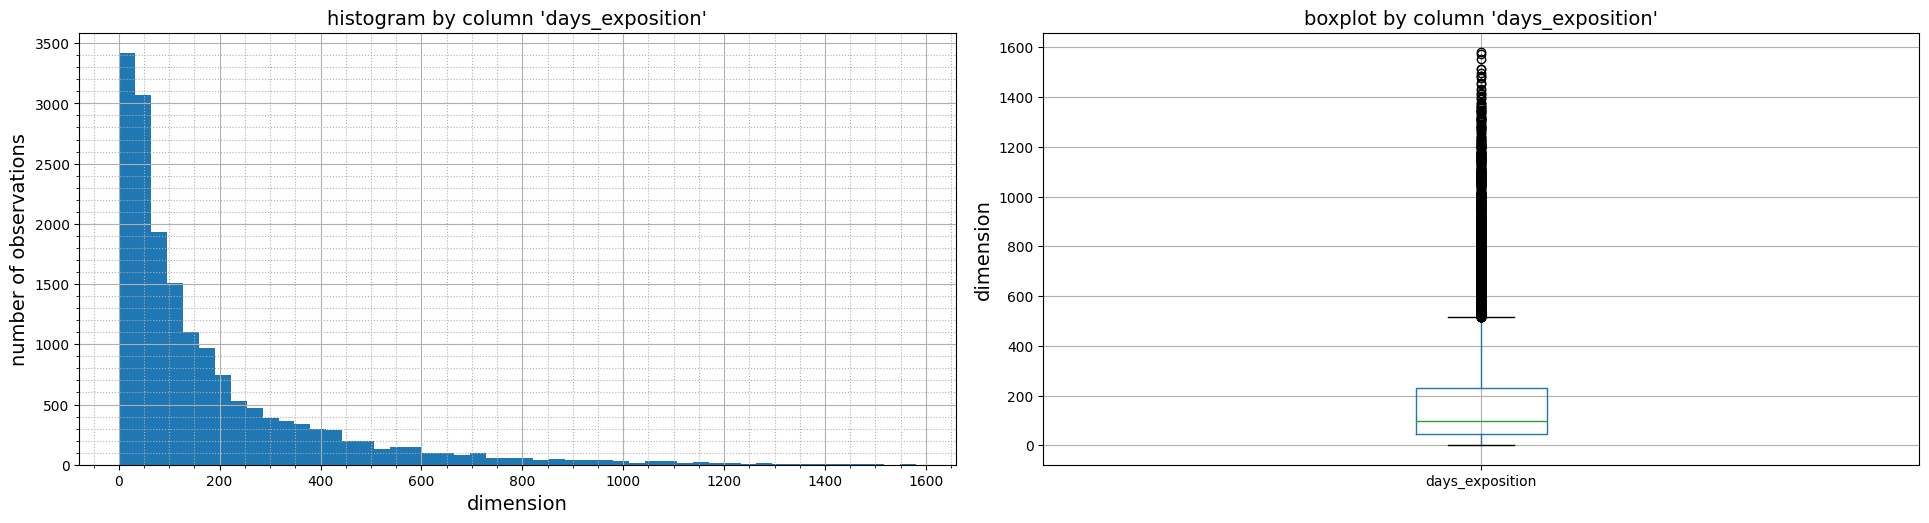

In [73]:
anomalies(data, 'days_exposition')

Text(0.5, 1.0, "histogram by column 'first_day_exposition'")

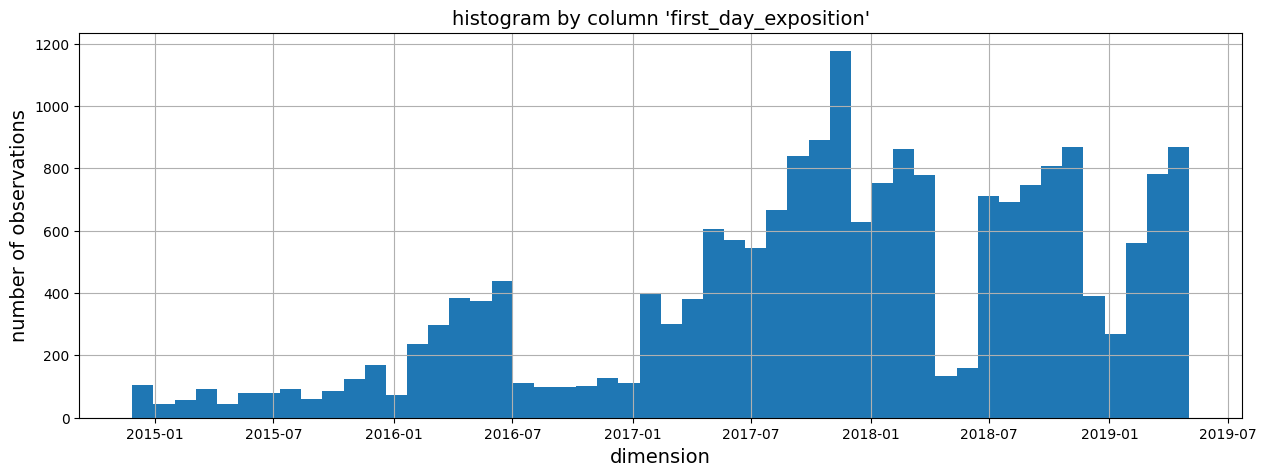

In [74]:
ax = data['first_day_exposition'].hist(bins=50, figsize=(15, 5))
ax.set_xlabel('dimension', fontsize=14)
ax.set_ylabel('number of observations', fontsize=14)
ax.set_title(f"histogram by column 'first_day_exposition'", fontsize=14)

По датам видим активное развитие сервиса, есть непонятные провалы, требуется более глубокое изучение истории работы сервиса и рынка недвижимости

### Посчитаем и добавим в таблицу новые столбцы

-   цена одного квадратного метра;
-   день недели публикации объявления;
-   месяц публикации объявления;
-   год публикации объявления;
-   тип этажа квартиры (значения — «‎первый», «последний», «другой»);
-   расстояние до центра города в километрах 

In [75]:
data['price_per_square_meter'] = data['last_price'] / data['total_area']

In [76]:
data['weekday_exposition'] = data['first_day_exposition'].dt.dayofweek

In [77]:
data['month_exposition'] = data['first_day_exposition'].dt.month

In [78]:
data['year_exposition'] = data['first_day_exposition'].dt.year

In [79]:
data['floor_type'] = 'other'
data.loc[data['floor'] == data['floors_total'], 'floor_type'] = 'last'
data.loc[data['floor'] == 1, 'floor_type'] = 'first'

In [80]:
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).astype('Int64')

### Проведем исследовательский анализ данных

####  Изучим следующие параметры объектов:
    -   общая площадь;
    -   жилая площадь;
    -   площадь кухни;
    -   цена объекта;
    -   количество комнат;
    -   высота потолков;
    -   этаж квартиры;
    -   тип этажа квартиры («первый», «последний», «другой»);
    -   общее количество этажей в доме;
    -   расстояние до центра города в метрах;
    -   расстояние до ближайшего аэропорта;
    -   расстояние до ближайшего парка;
    -   день и месяц публикации объявления.

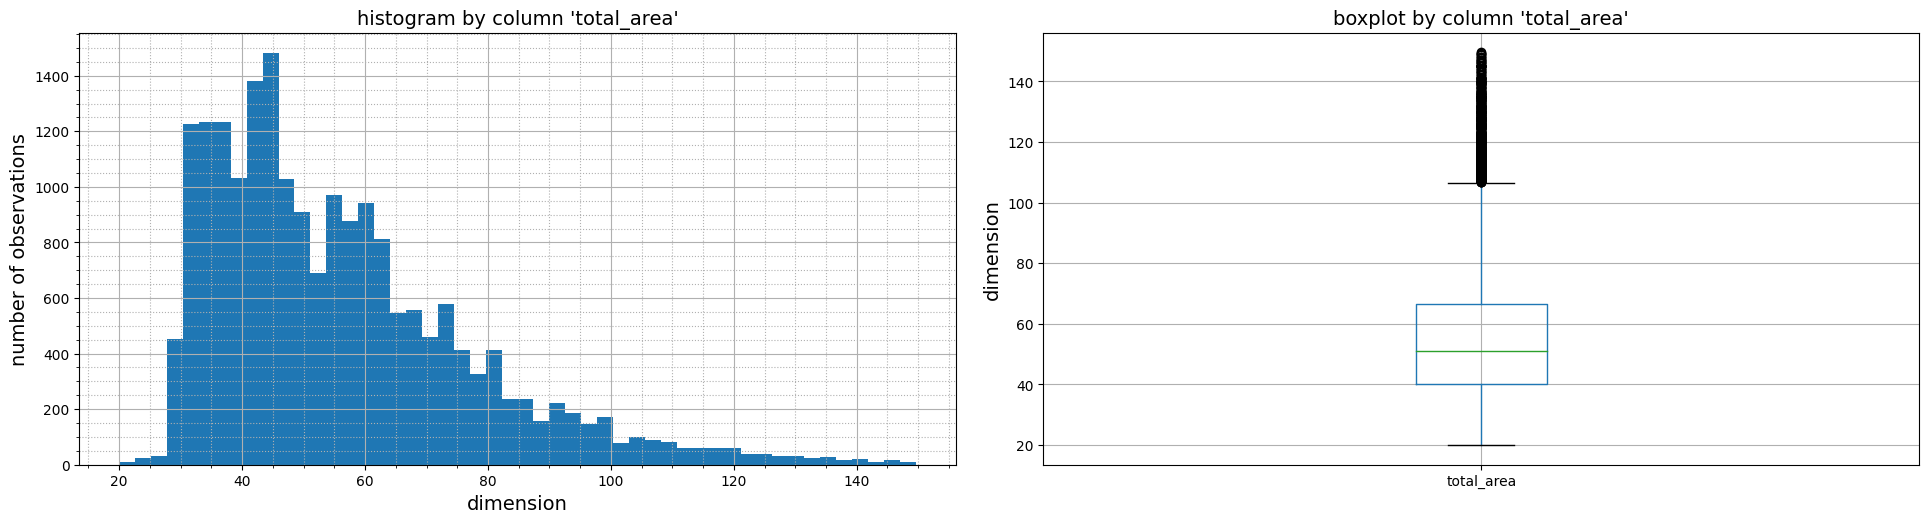

In [81]:
anomalies(data, 'total_area')

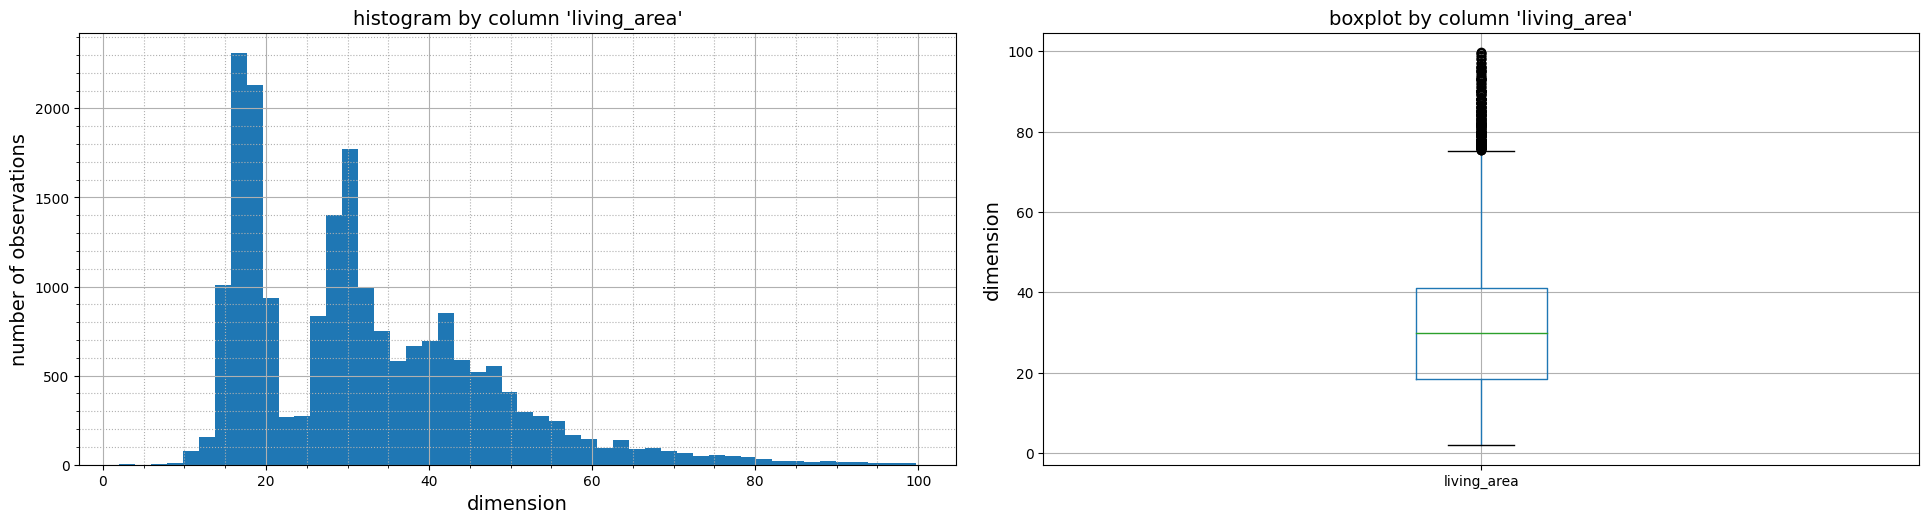

In [82]:
anomalies(data, 'living_area')

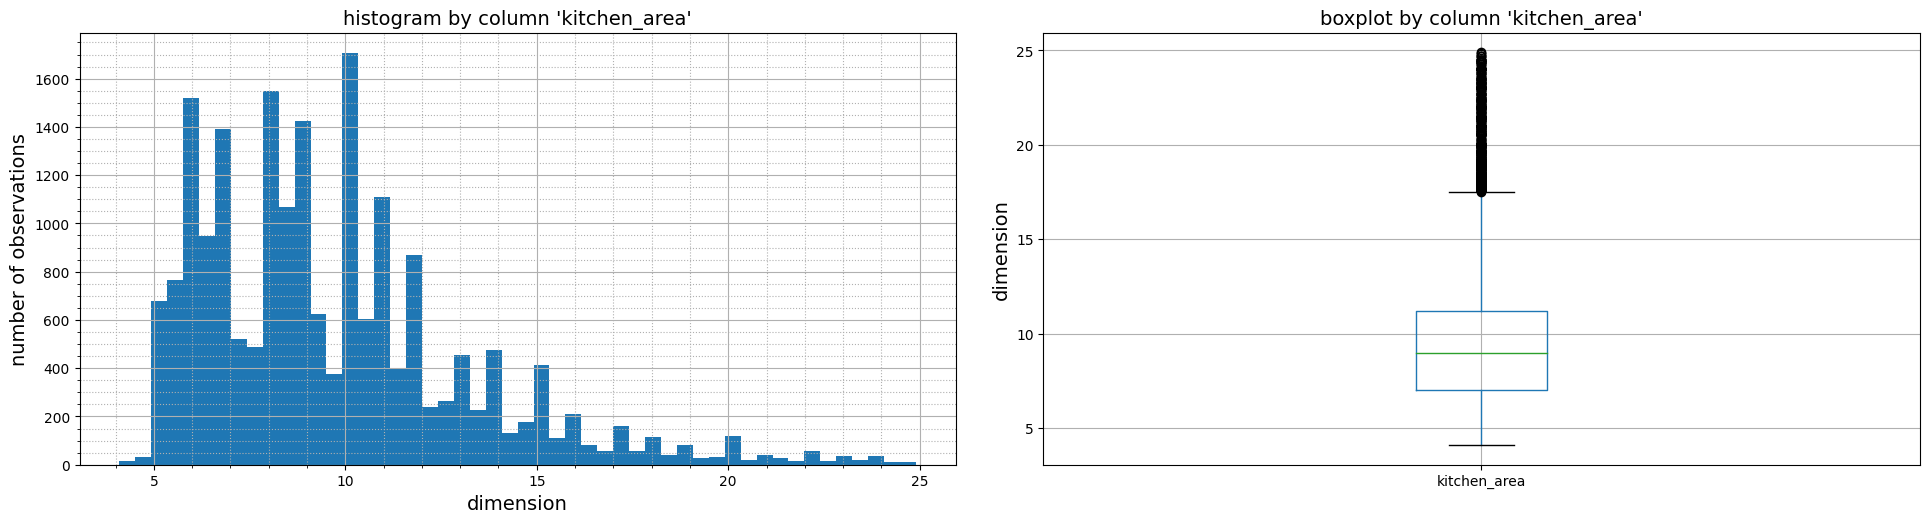

In [83]:
anomalies(data, 'kitchen_area')

По параметрам:
-   общая площадь;
-   жилая площадь;
-   площадь кухни;
мы наблюдаем резкие переходы, что вероятно связано с типовой застройкой, а также длинные хвосты, это вполне логично. Аномальных значений мало.

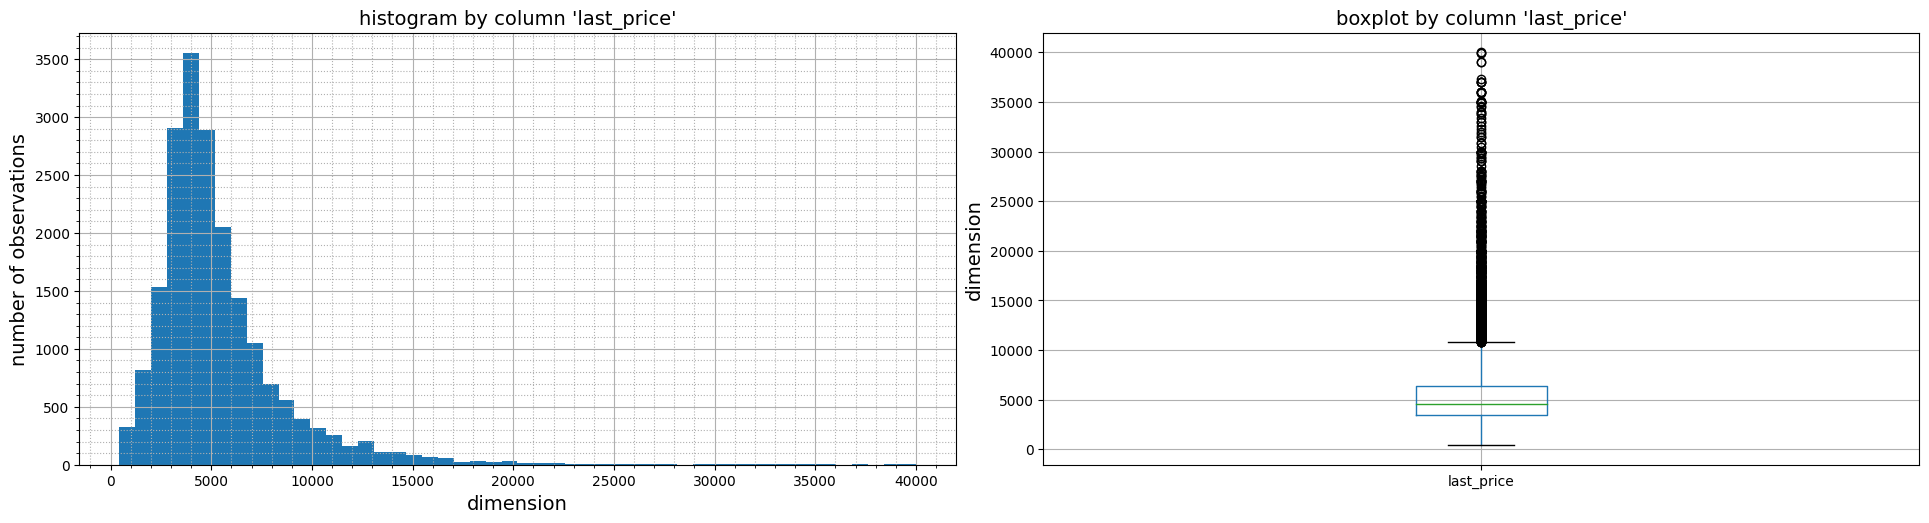

In [84]:
anomalies(data, 'last_price')

По цене наблюдаем нормальное распределение с единичными квартирами стоимостью свыше 20 млн. рублей

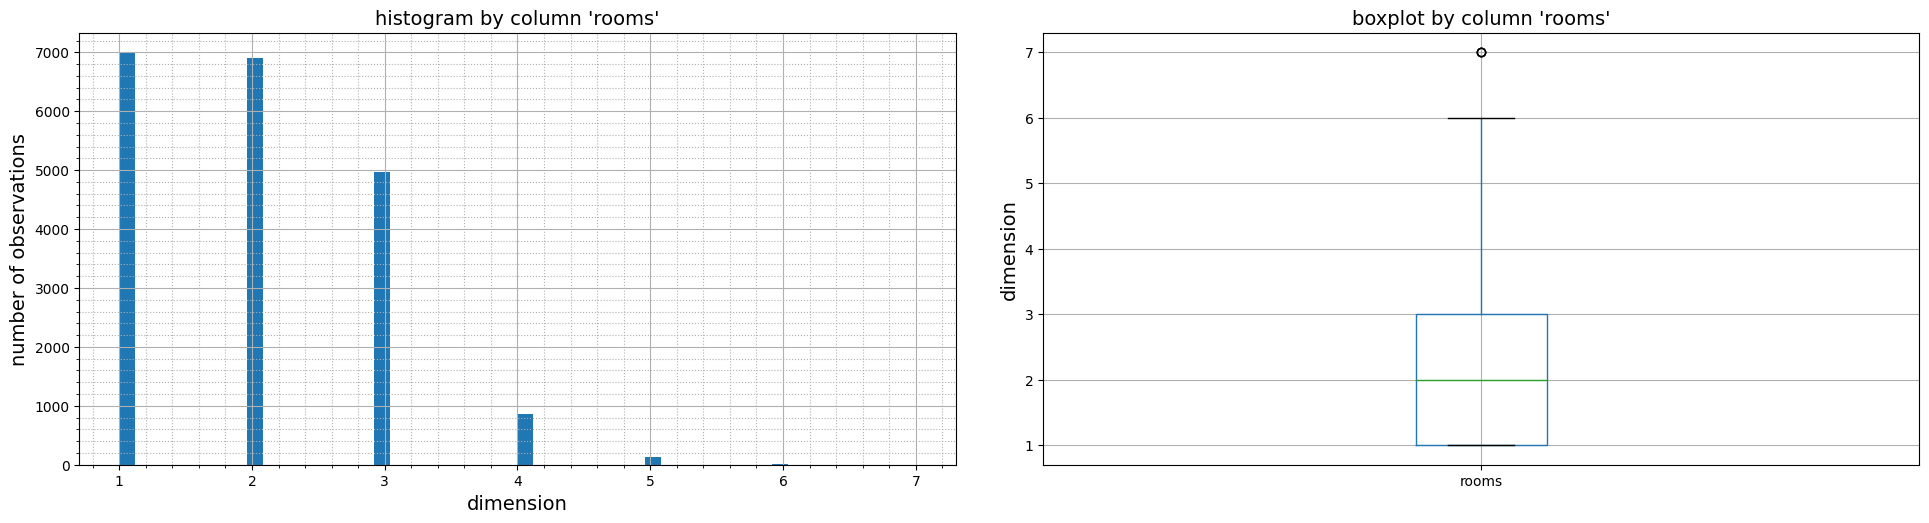

In [85]:
anomalies(data, 'rooms')

По количеству комнат вполне ожидаемо лидируют с большим отрывом 1,2,3 комнатные квартиры

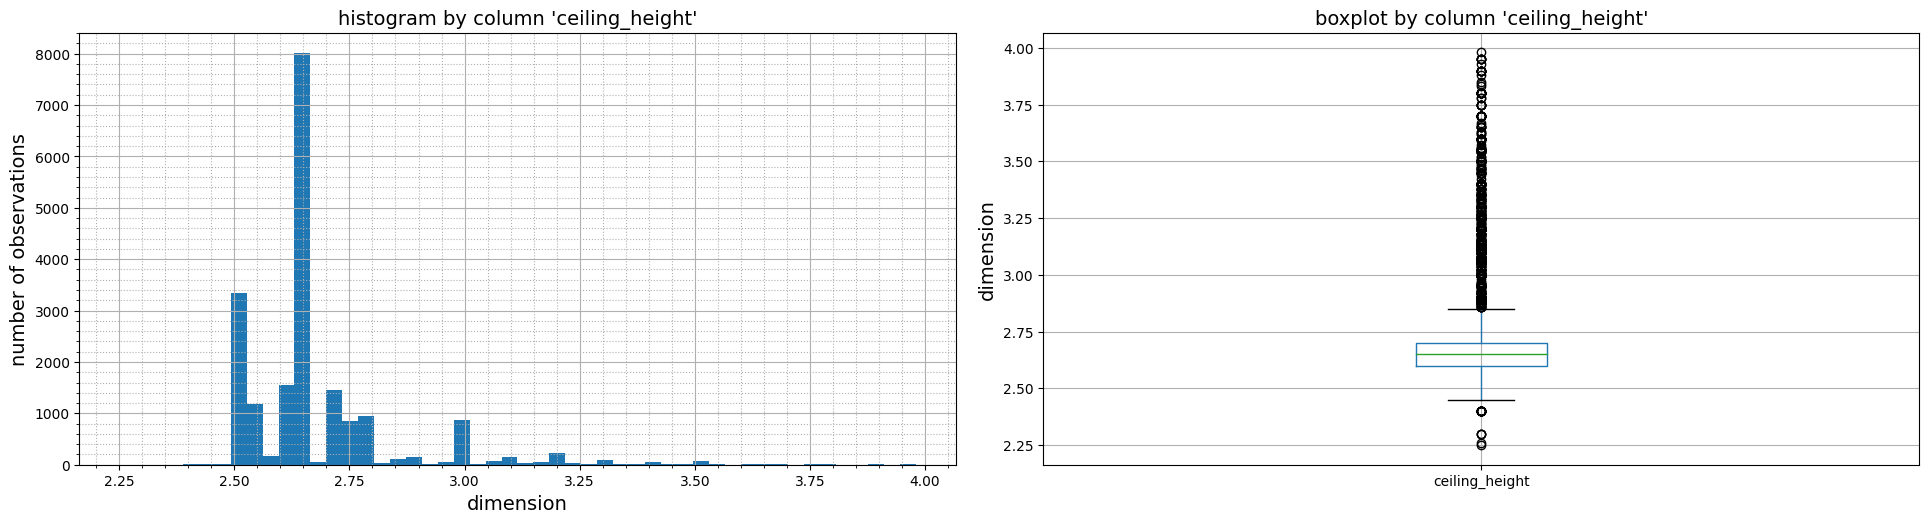

In [86]:
anomalies(data, 'ceiling_height')

По высоте потолков: 75% наблюдений в диапазоне 2,5 - 2,8 метров и отдельный пик в районе 3 метров.

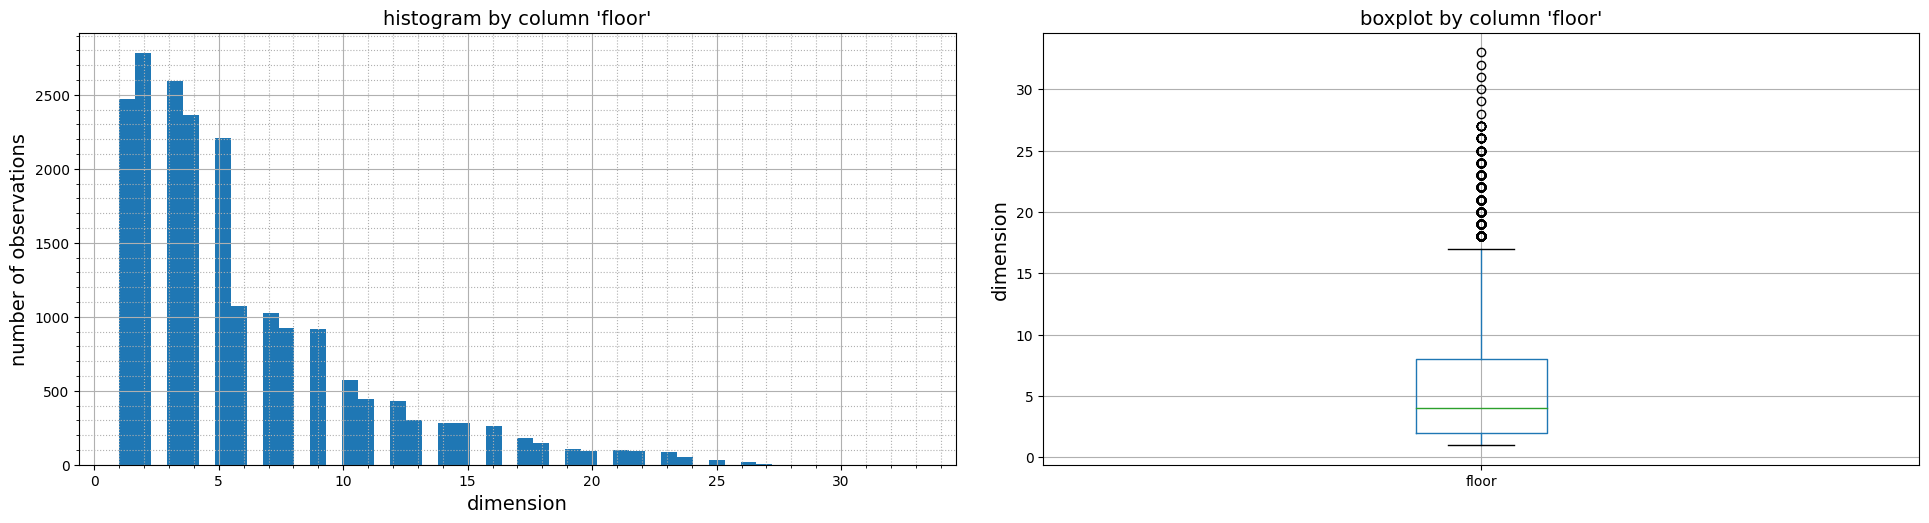

In [87]:
anomalies(data, 'floor')

По этажу квартиры:  пик с 1 по 5 этаж объясняется большим количеством типовых пятиэтажных домов, аналогично с 9 этажом

<Axes: >

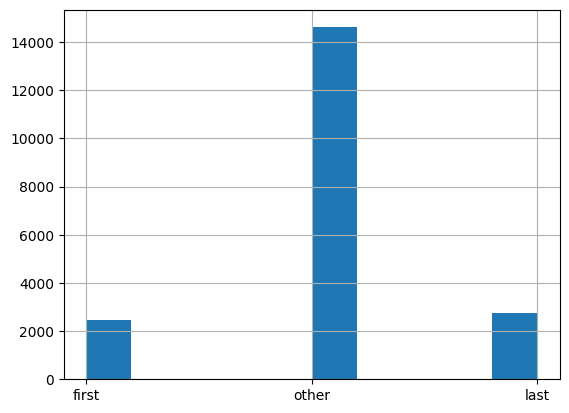

In [88]:
data['floor_type'].hist()

По типу этажа мы видим превышение последних этажей над первыми, что объясняется малым количеством одноэтажный домов в выборке и частым использованием первых этажей в коммерции.

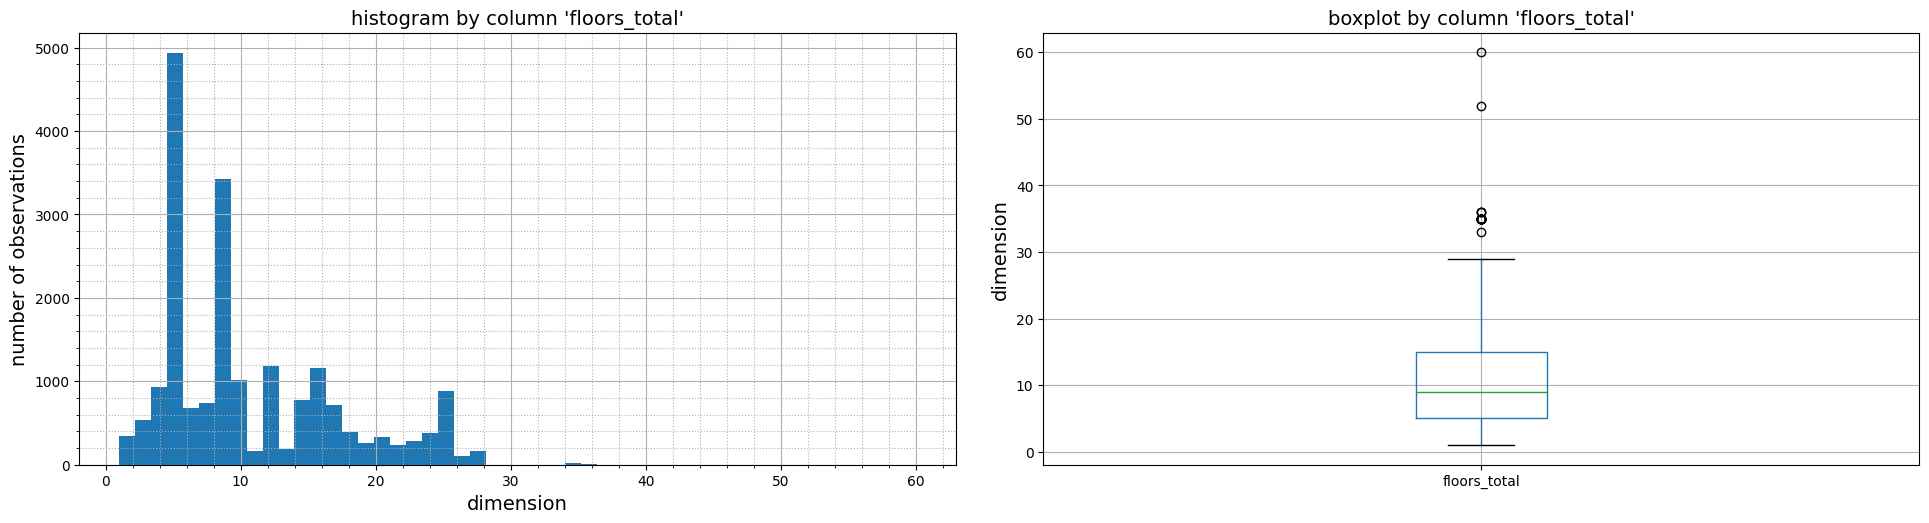

In [89]:
anomalies(data, 'floors_total')

общее количество этажей в доме: ожидаемые пики связанные с типовой застройкой.

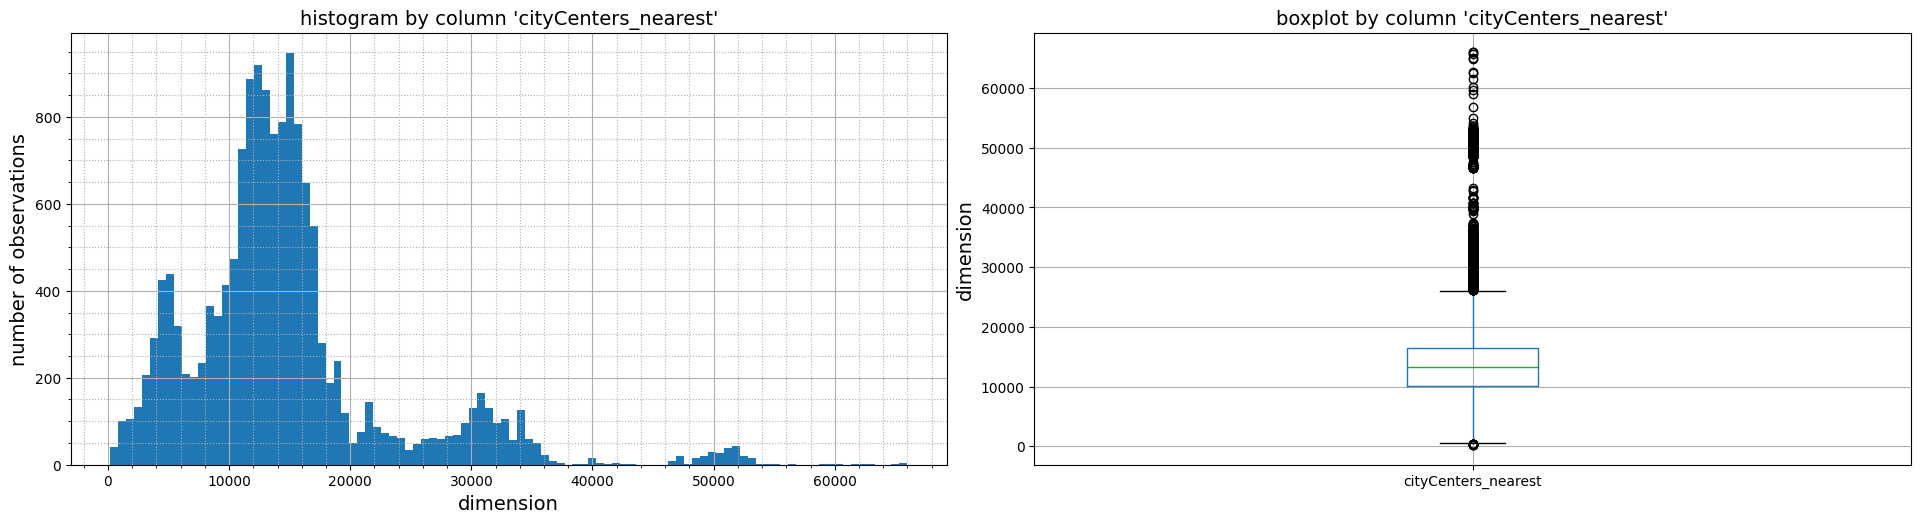

In [90]:
anomalies(data, 'cityCenters_nearest', bins=100)

3/4 объектов расположены в пределах 16 км от центра, предположительно в этой зоне заканчивается пригород Санкт-Петербурга. Наблюдаем необычный провал 6-8 км, предположительно из-за расположения города на берегу залива.

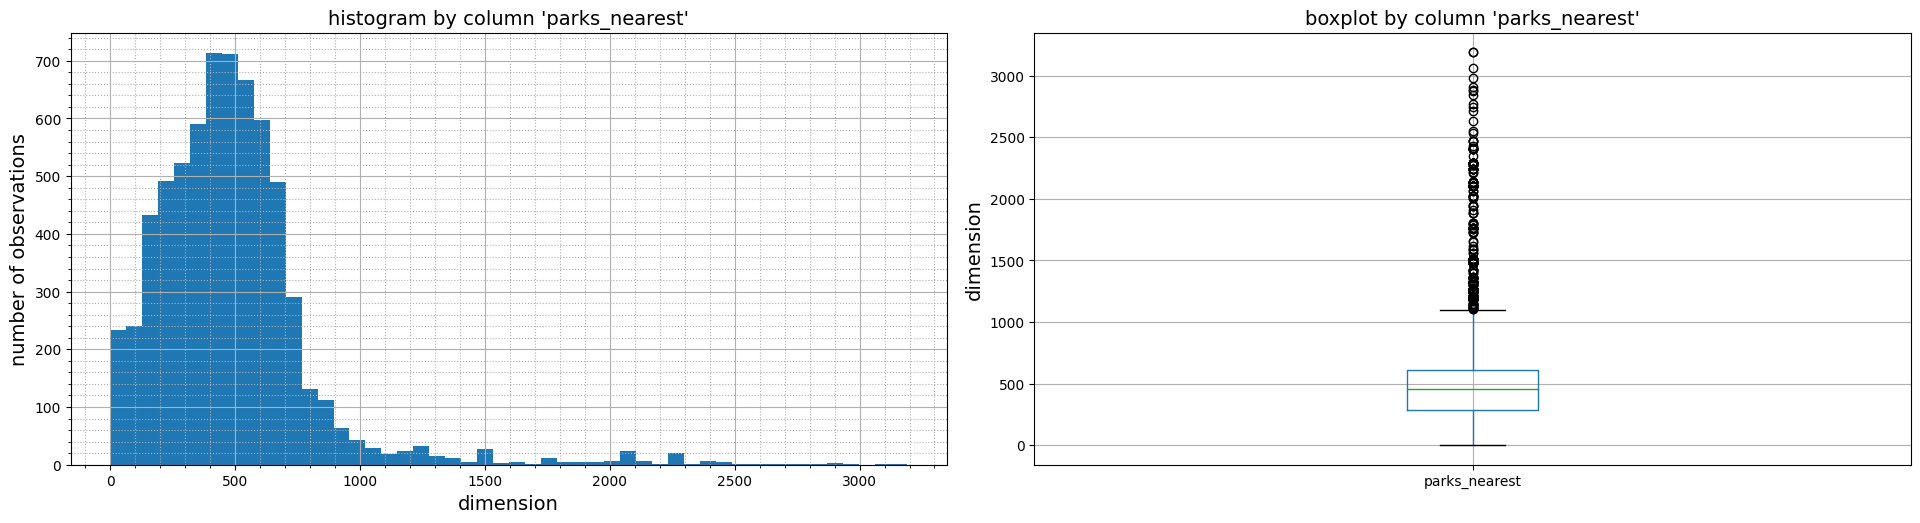

In [91]:
anomalies(data, 'parks_nearest')

удаленность парков не более 1 км

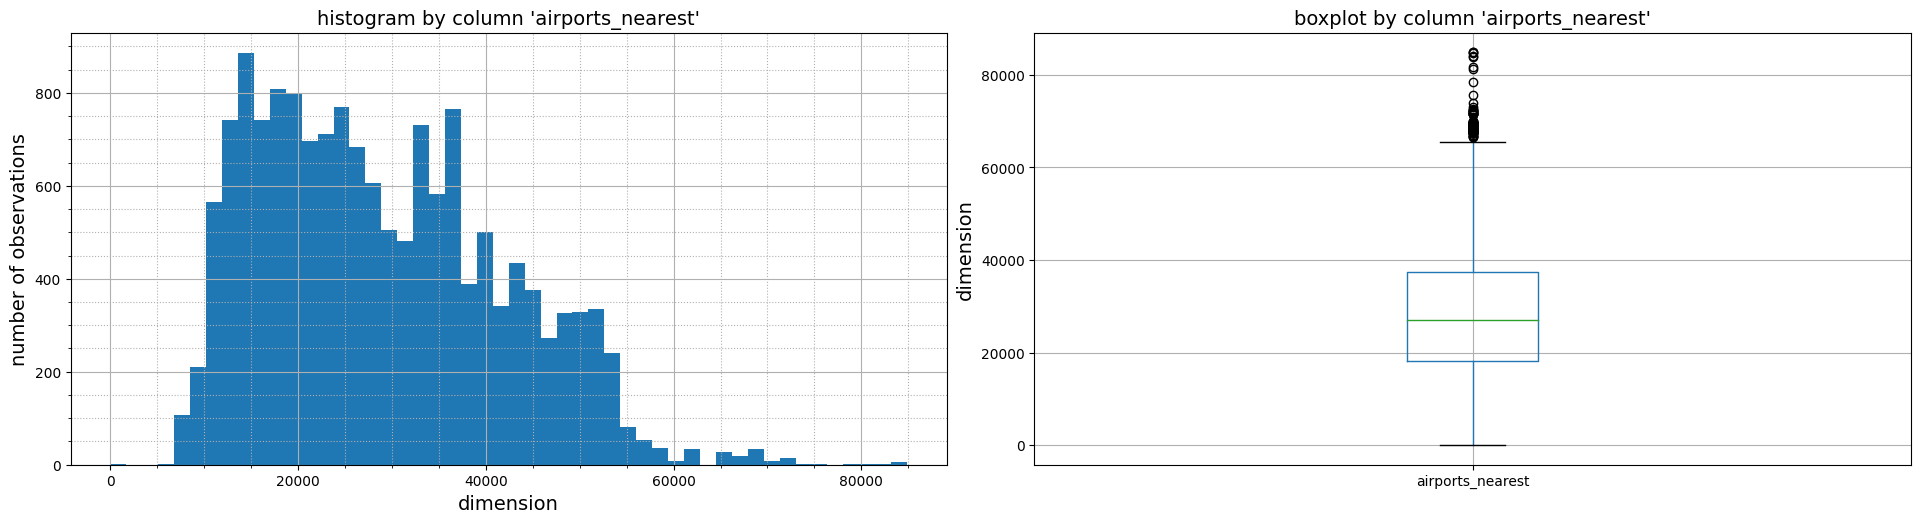

In [92]:
anomalies(data, 'airports_nearest')

У аэропорта в радиусе 6 км очень низкая плотность жилой застройки

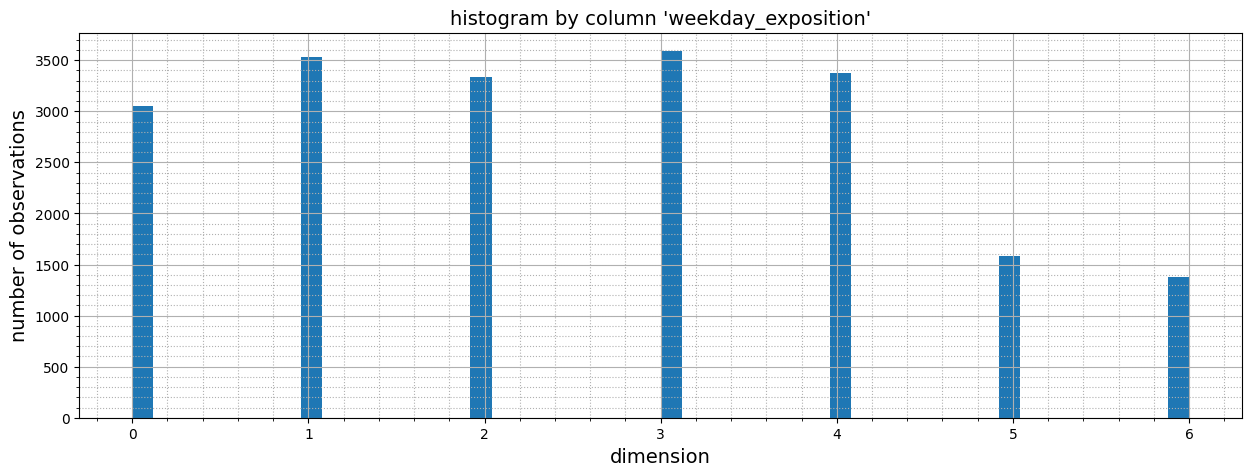

In [93]:
anomalies_hist(data, 'weekday_exposition')

Интересное наблюдение: в будние дни выставляется в 2 раза больше объявлений, возможно это связано с риэлторскими фирмами

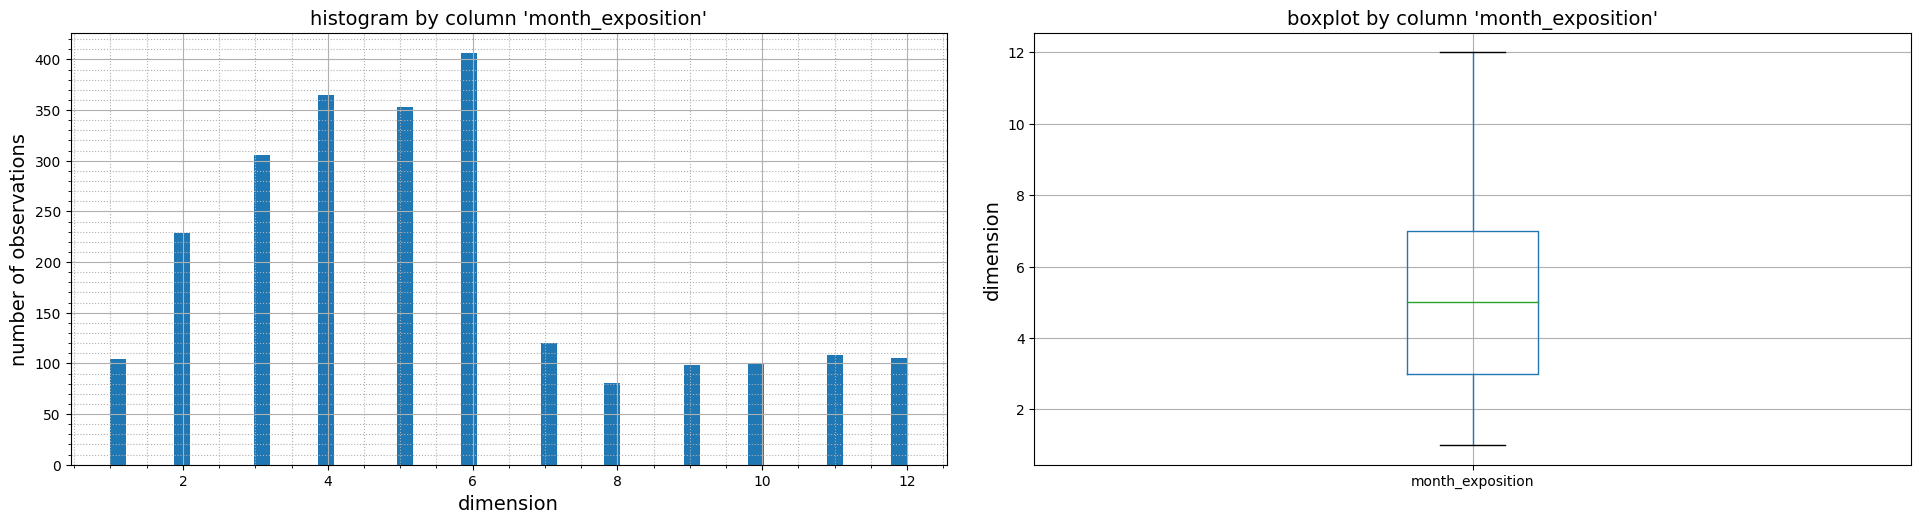

In [94]:
anomalies(data.loc[data['year_exposition'] == 2016], 'month_exposition')

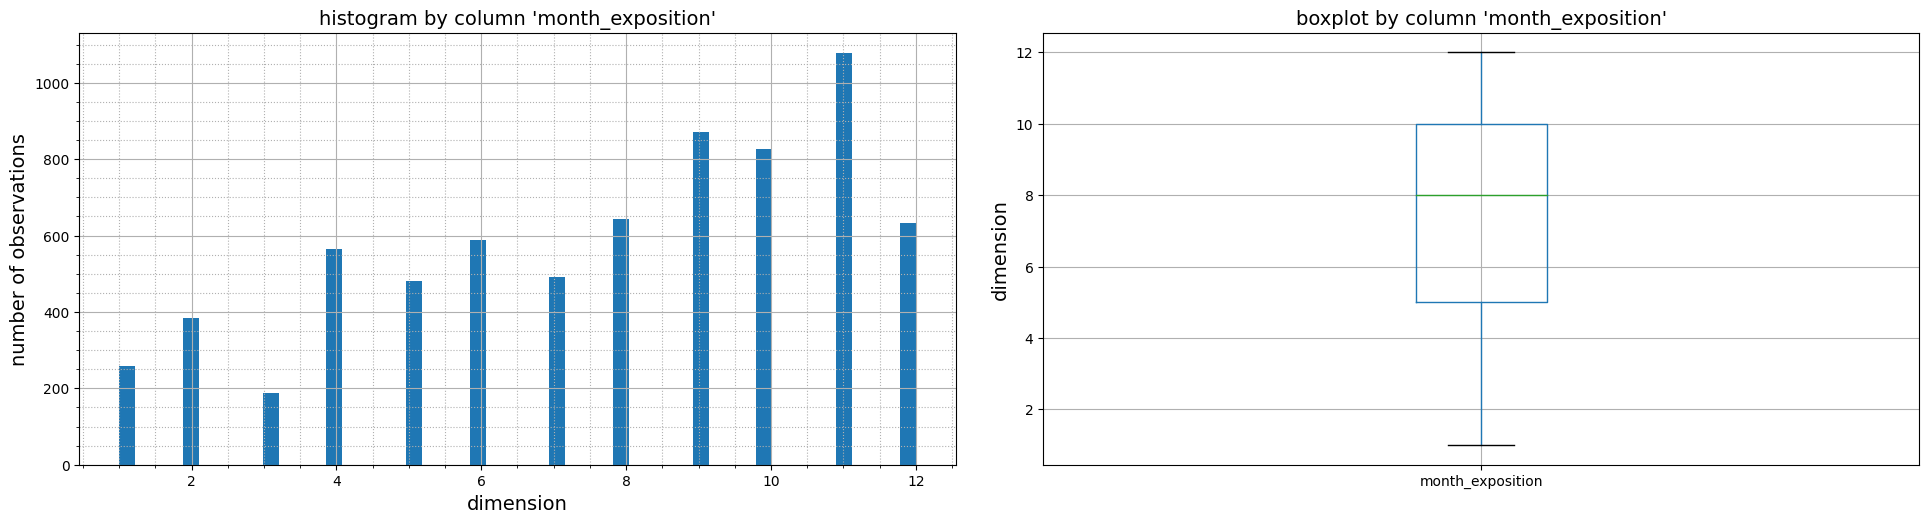

In [95]:
anomalies(data.loc[data['year_exposition'] == 2017], 'month_exposition')

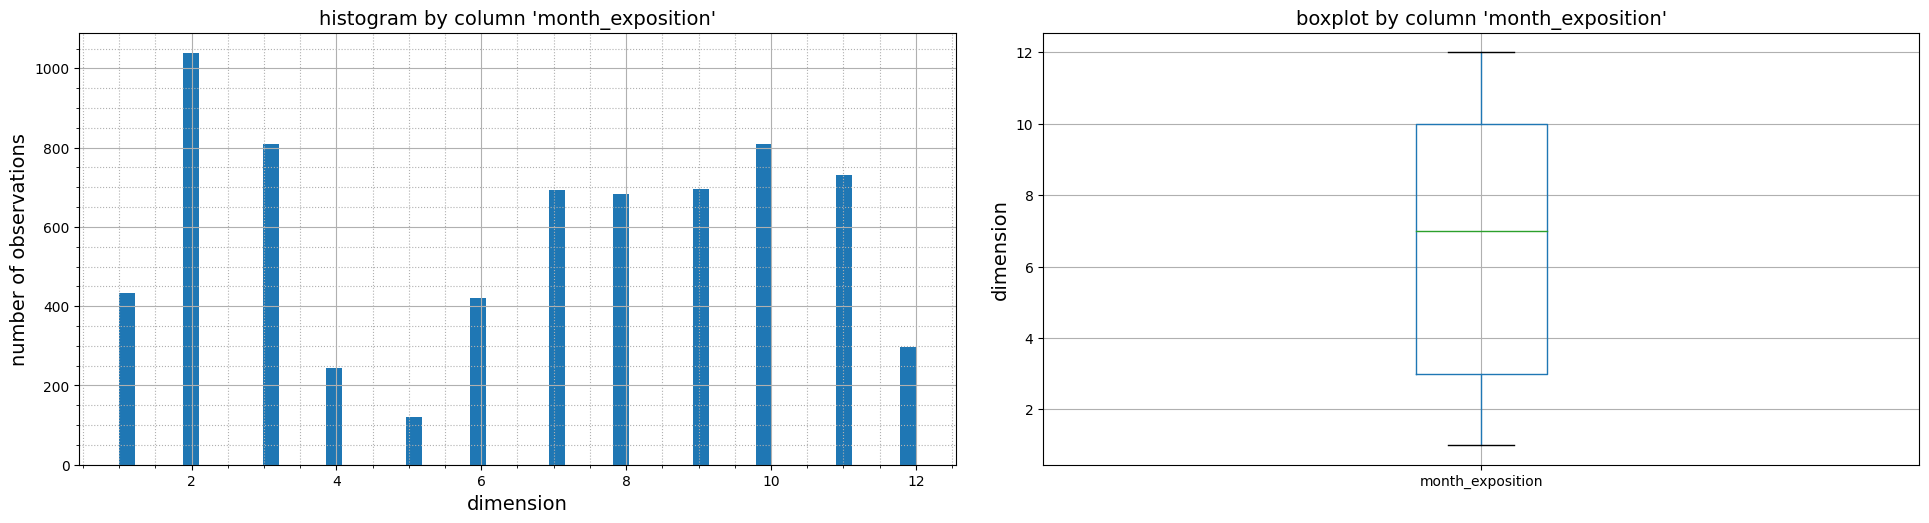

In [96]:
anomalies(data.loc[data['year_exposition'] == 2018], 'month_exposition')

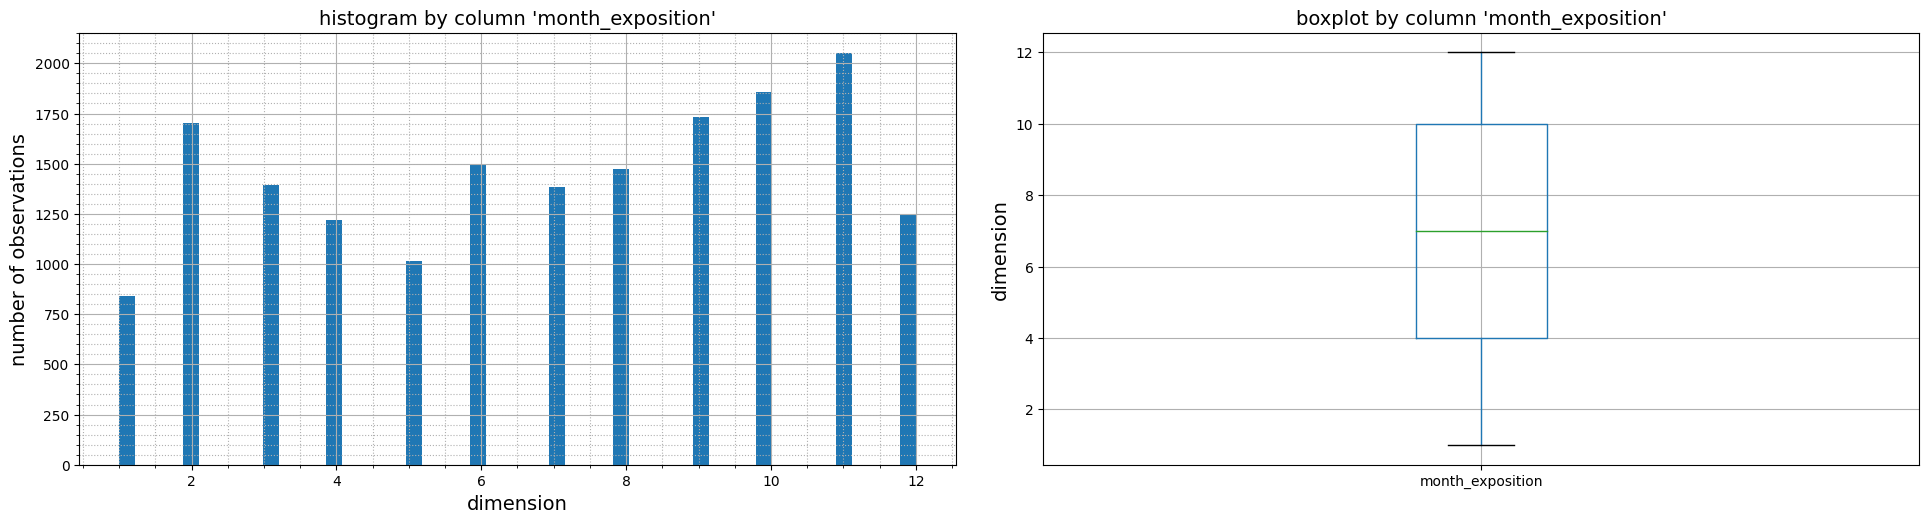

In [97]:
anomalies(data.loc[data['year_exposition'] < 2019], 'month_exposition')

Мы сделали срез без 2019 года, так как он неполный и вносит искажения в размещения объявлений по месяцам. Мы видим снижение активности в декабре (видимо продавцы откладывают продажу квартиры перед новым годом) и наименьшое количество объявлений в январе ( связано с самыми длительными праздниками в году). Резкий спад с февраля по май в 2018 году и во втором полугодии 2016 года требуют более глубокого исследования.

распределение по годам:

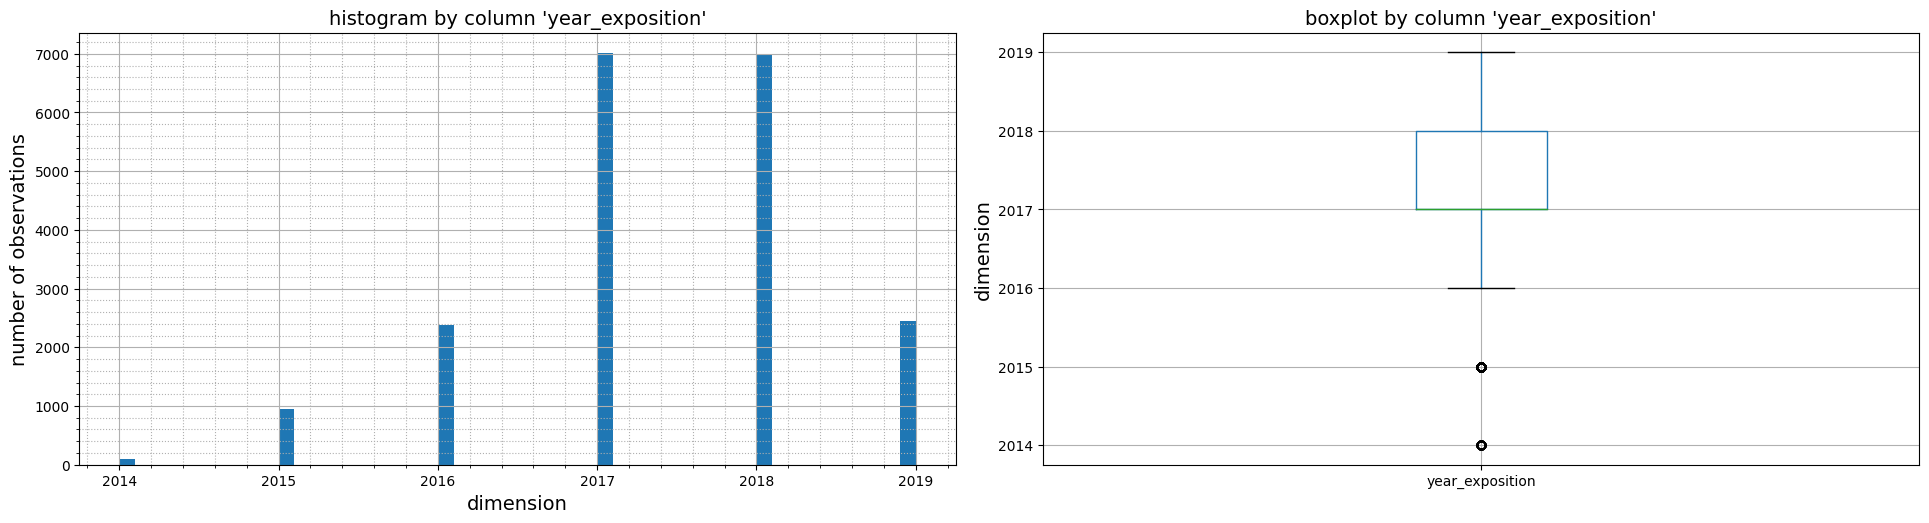

In [98]:
anomalies(data, 'year_exposition')

#### Изучим, как быстро продавались квартиры

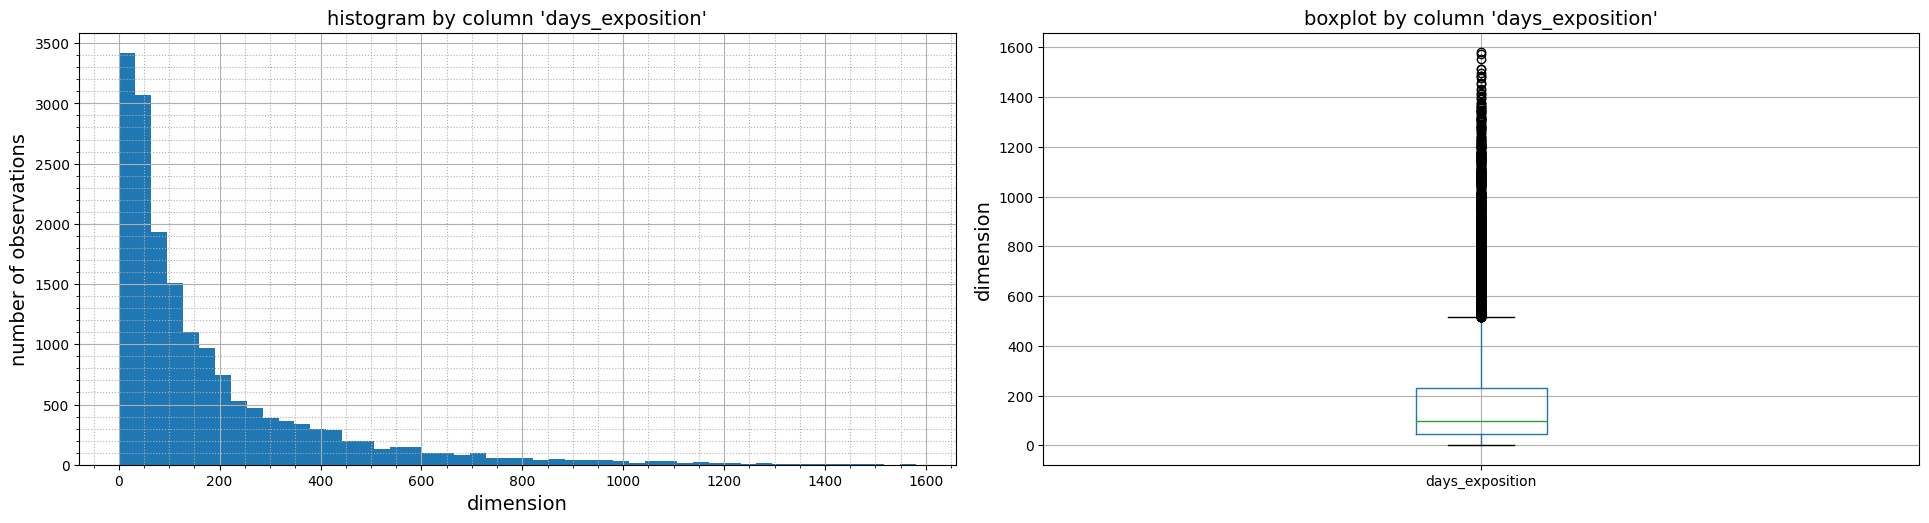

In [99]:
anomalies(data, 'days_exposition')

Сделаем срез в 600 дней:

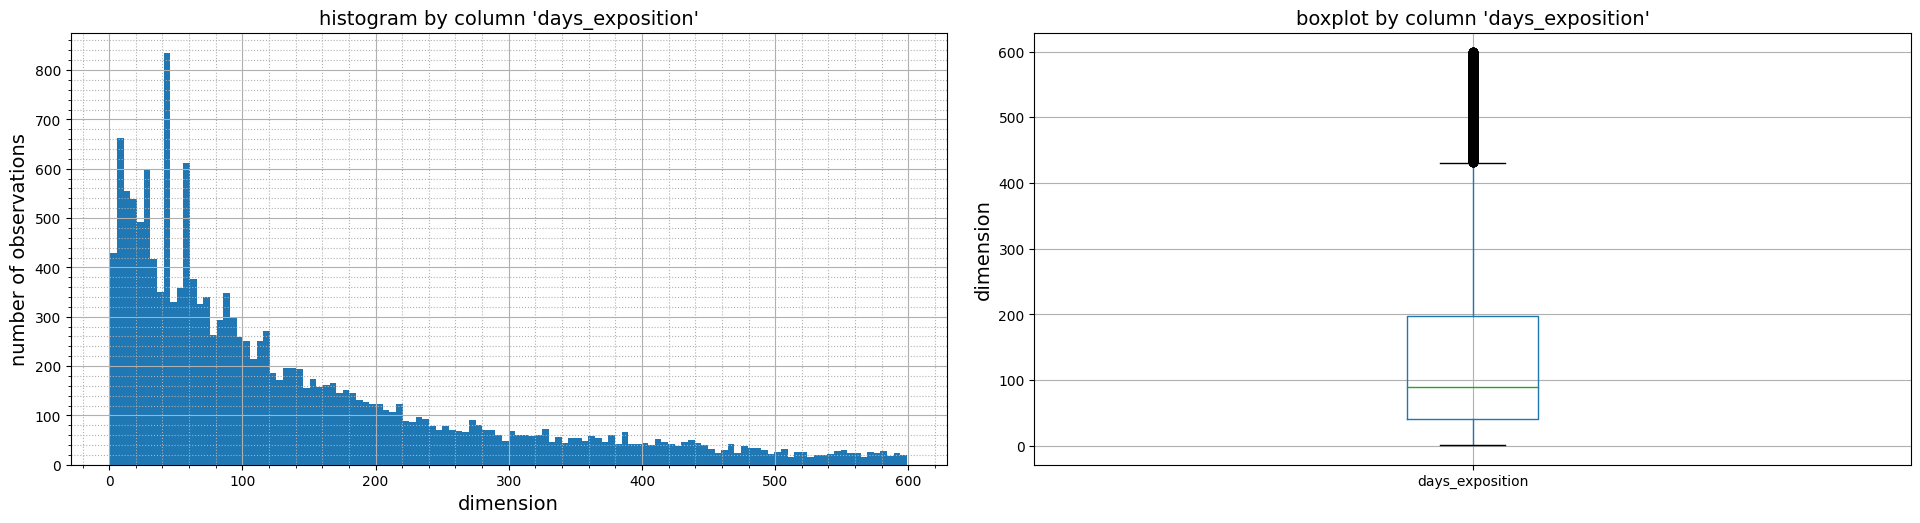

In [100]:
anomalies(data.loc[data['days_exposition'] < 600], 'days_exposition', bins=120)

Укрупним:

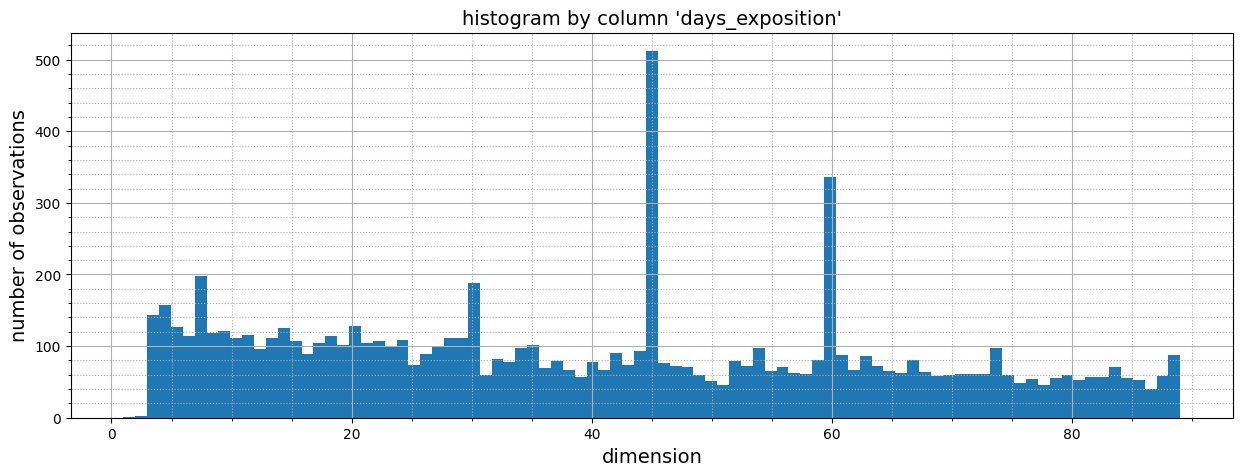

In [101]:
anomalies_hist(data.loc[data['days_exposition'] < 90], 'days_exposition', bins=89)

Мы видим пики в 7, 30, 45, 60 дней. Вероятно это связано с механизмом автозакрытия объявлений на сайте.

Посчитаем среднее и медиану по очищенным от аномалий данным:

In [102]:
data.loc[data['days_exposition'] < 600]['days_exposition'].mean().round(1)

140.4

In [103]:
data.loc[data['days_exposition'] < 600]['days_exposition'].median().round(1)

90.0

Вывод: Среднее в полтора раза больше медианы. Медиана лучше отражает нашу длительность продаж. Продажа половины квартир уложилась в три месяца (быстрые продажи), еще одна четверть полгода. Все что продавалось свыше полугода можно считать необычно долгими продажами

#### Изучим какие факторы больше всего влияют на общую (полную) стоимость объекта

зависит ли цена от:
    
    -   общей площади;
    -   жилой площади;
    -   площади кухни;
    -   количества комнат;
    -   этажа, на котором расположена квартира (первый, последний, другой);
    -   даты размещения (день недели, месяц, год).

In [104]:
data['total_area'] = data['total_area'].round()
df_total_area = data.pivot_table(index='total_area', values='last_price', aggfunc='median').reset_index()
df_total_area.sort_values('last_price')

total_area  last_price
1          21.0     1811.25
6          26.0     2440.00
2          22.0     2630.00
3          23.0     2800.00
8          28.0     2810.00
..          ...         ...
120       140.0    19950.00
117       137.0    19990.00
128       148.0    20950.00
130       150.0    23027.25
127       147.0    24650.00

[131 rows x 2 columns]

<Axes: title={'center': 'зависимость цены от общей площади'}, xlabel='total_area'>

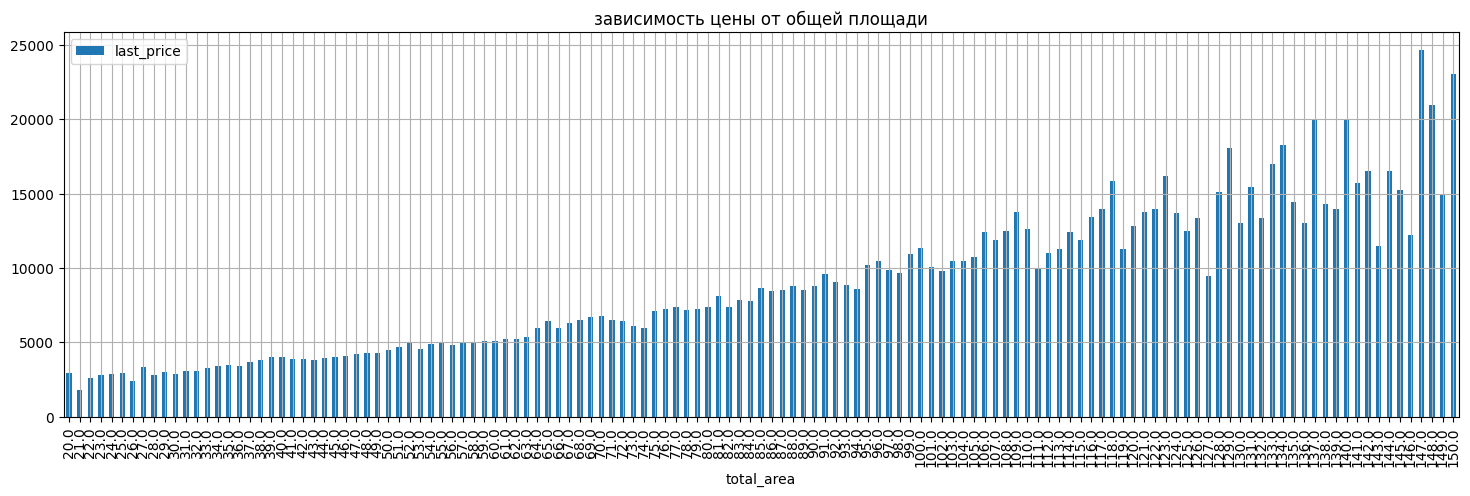

In [105]:
df_total_area.plot(x='total_area', y="last_price", kind='bar', 
                   figsize=(18,5), title='зависимость цены от общей площади', grid=True)

Ожидаемо цена плавно растет вместе с площадью

In [106]:
data['living_area'] = data['living_area'].round()
df_living_area = data.pivot_table(index='living_area', values='last_price', aggfunc='median').reset_index()

<Axes: title={'center': 'зависимость цены от жилой площади'}, xlabel='living_area'>

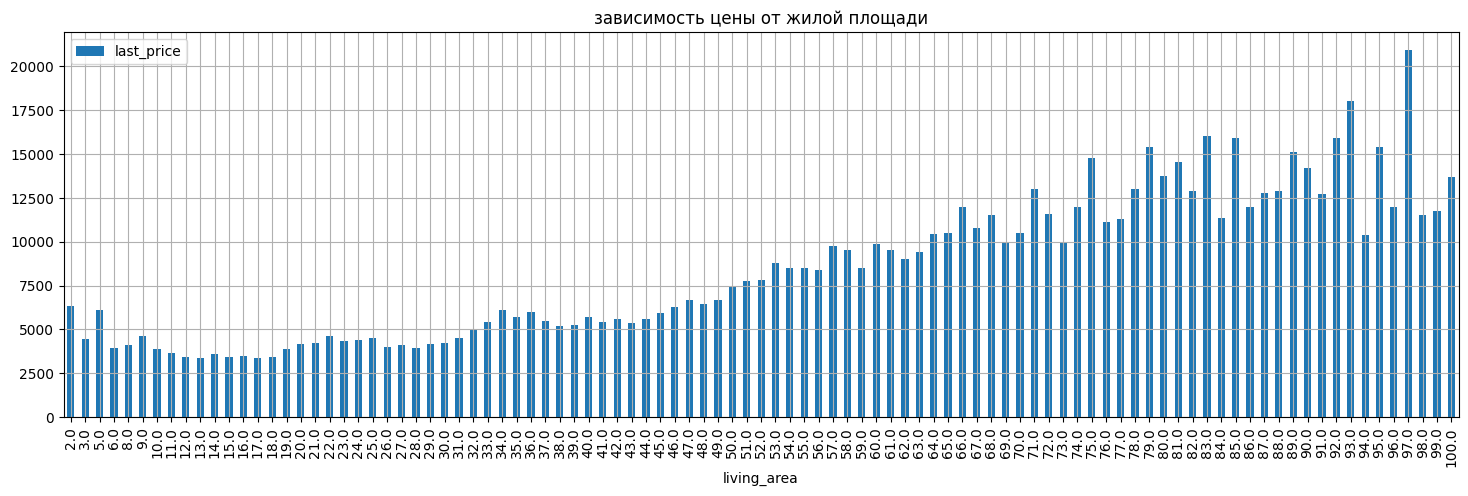

In [107]:
df_living_area.plot(x='living_area', y="last_price", kind='bar', figsize=(18,5), title='зависимость цены от жилой площади', grid=True)

Тоже самое, цена плавно растет вместе с площадью

In [108]:
data['kitchen_area'] = data['kitchen_area'].round()
df_kitchen = data.pivot_table(index='kitchen_area', values='last_price', aggfunc='median').reset_index()

<Axes: title={'center': 'зависимость цены от площади кухни'}, xlabel='kitchen_area'>

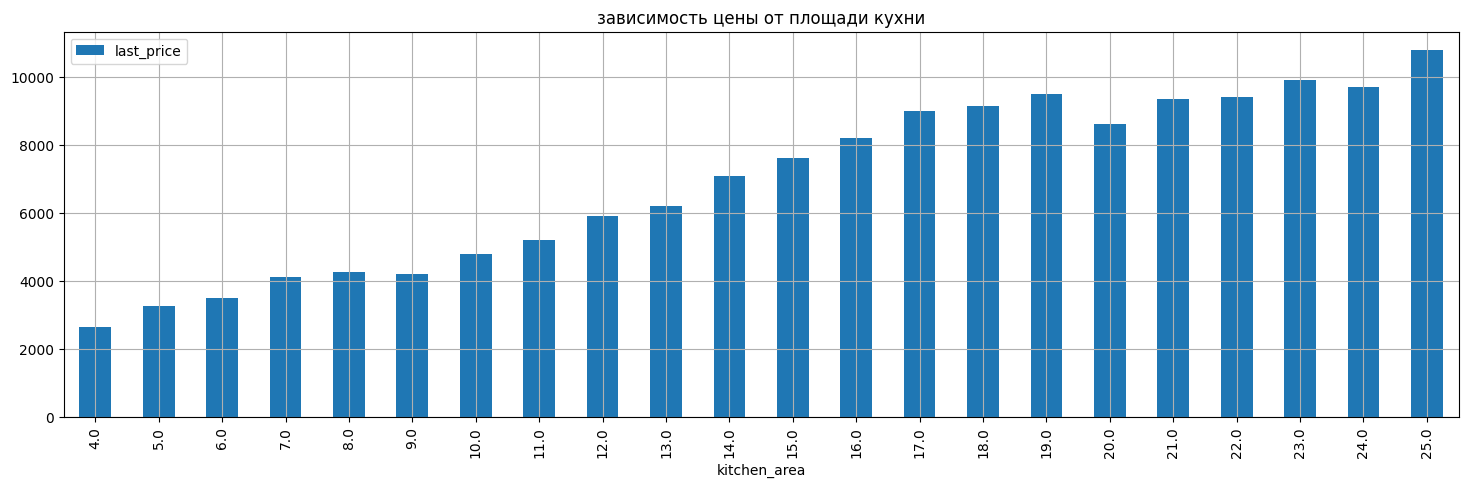

In [109]:
df_kitchen.plot(x='kitchen_area', y="last_price", kind='bar', figsize=(18,5), title='зависимость цены от площади кухни', grid=True)

Тоже самое, цена плавно растет вместе с площадью

Посмотрим на соотношение выше рассмотренных площадей к цене с помощью инструмента pairplot:

C:\Users\m5612\anaconda3\envs\streamlit\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


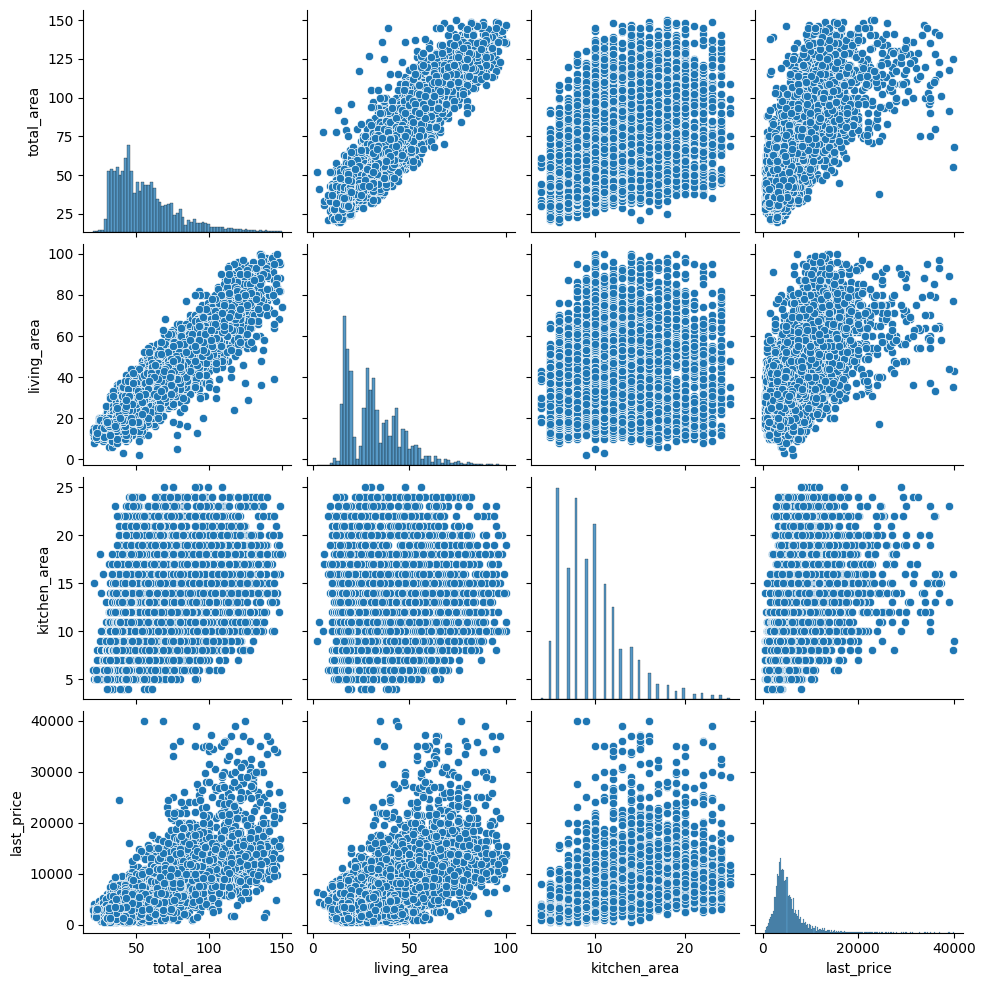

In [110]:
sns.pairplot(data[['total_area', 'living_area', 'kitchen_area', 'last_price']])

Графики подтверждают предыдущие выводы. Дополнительно мы видим сильный разброс, который говорит нам о большом влиянии других факторов на цену.

посмотрим на зависимость цены от количества комнат:

<Axes: title={'center': 'зависимость цены от количества комнат'}, xlabel='rooms'>

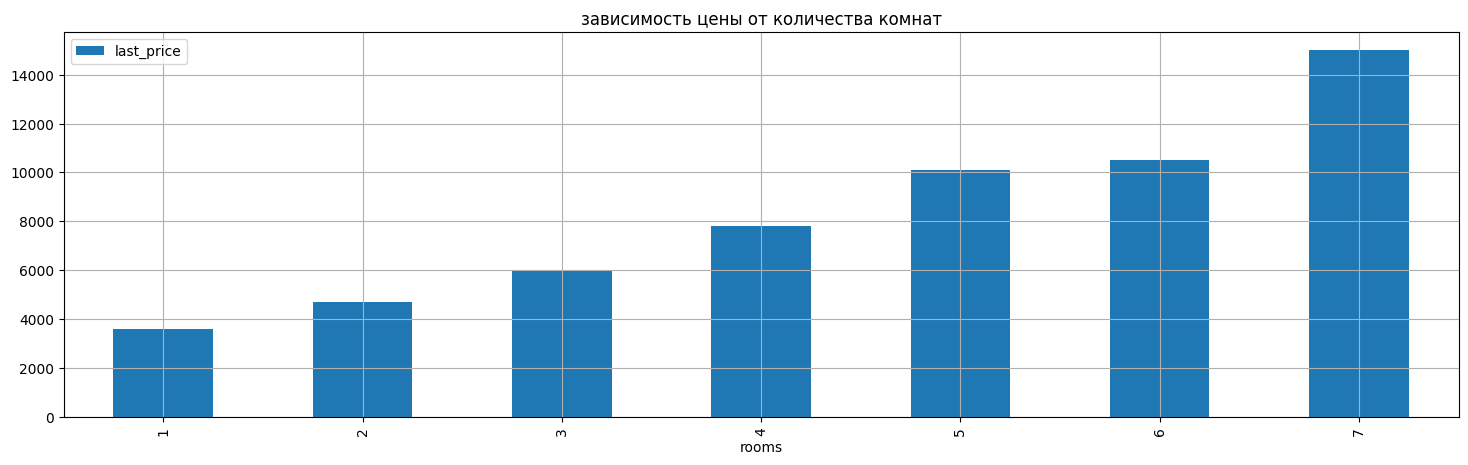

In [111]:
df_rooms = data.pivot_table(index='rooms', values='last_price', aggfunc='median').reset_index()
df_rooms.plot(x='rooms', y="last_price", kind='bar', figsize=(18,5), title='зависимость цены от количества комнат', grid=True)

цена плавно растет вместе с количеством комнат

<Axes: title={'center': 'зависимость цены от категории этажа'}, xlabel='floor_type'>

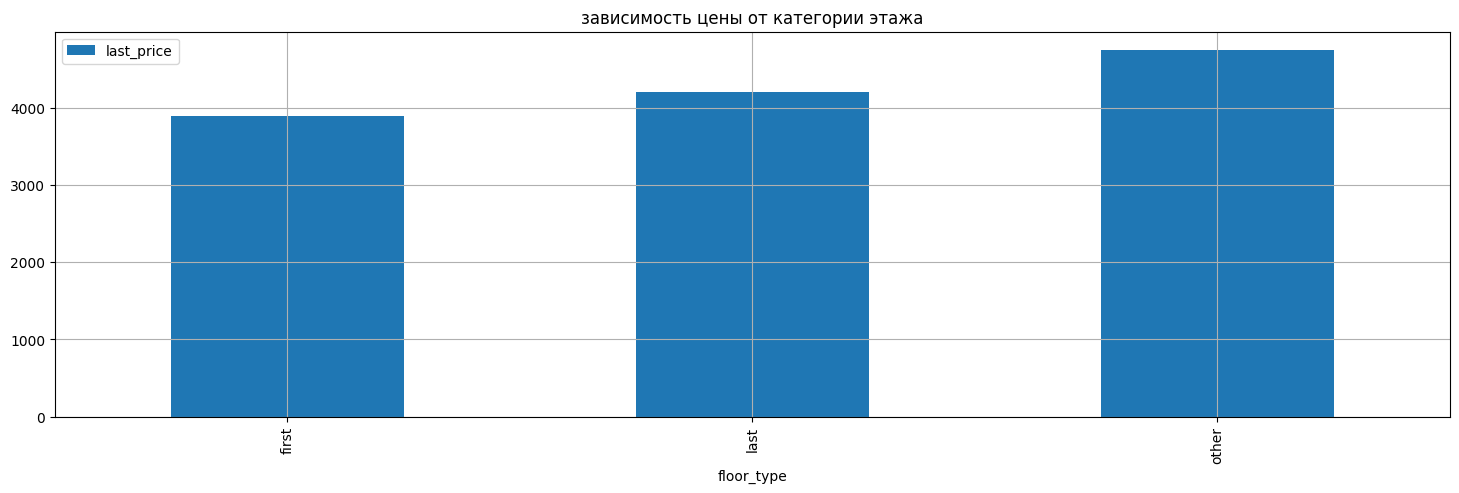

In [112]:
df_floor_type = data.pivot_table(index='floor_type', values='last_price', aggfunc='median').reset_index()
df_floor_type.plot(x='floor_type', y="last_price", kind='bar', figsize=(18,5), title='зависимость цены от категории этажа', grid=True)

In [113]:
df_floor_type

floor_type  last_price
0      first      3900.0
1       last      4200.0
2      other      4750.0

Первый этаж самый дешевый, последний немного дороже, остальные этажи самые дорогие

<Axes: title={'center': 'зависимость цены от дня недели'}, xlabel='weekday_exposition'>

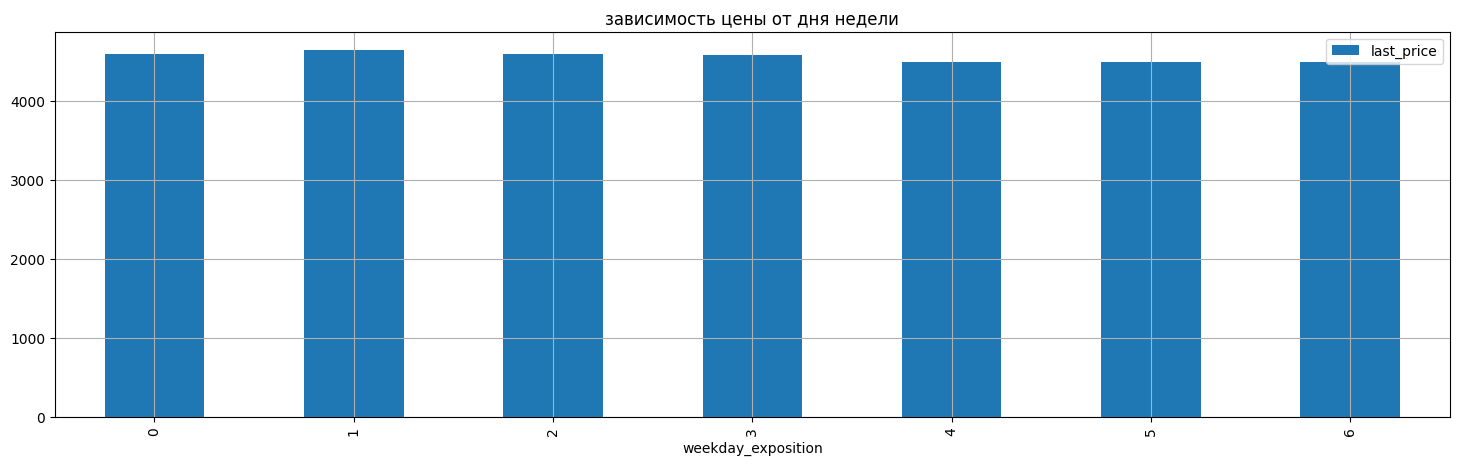

In [114]:
df_weekday = data.pivot_table(index='weekday_exposition', values='last_price', aggfunc='median').reset_index()
df_weekday.plot(x='weekday_exposition', y="last_price", kind='bar', figsize=(18,5), title='зависимость цены от дня недели', grid=True)

Увеличим размеры графика:

<Axes: title={'center': 'зависимость цены от дня недели'}, xlabel='weekday_exposition'>

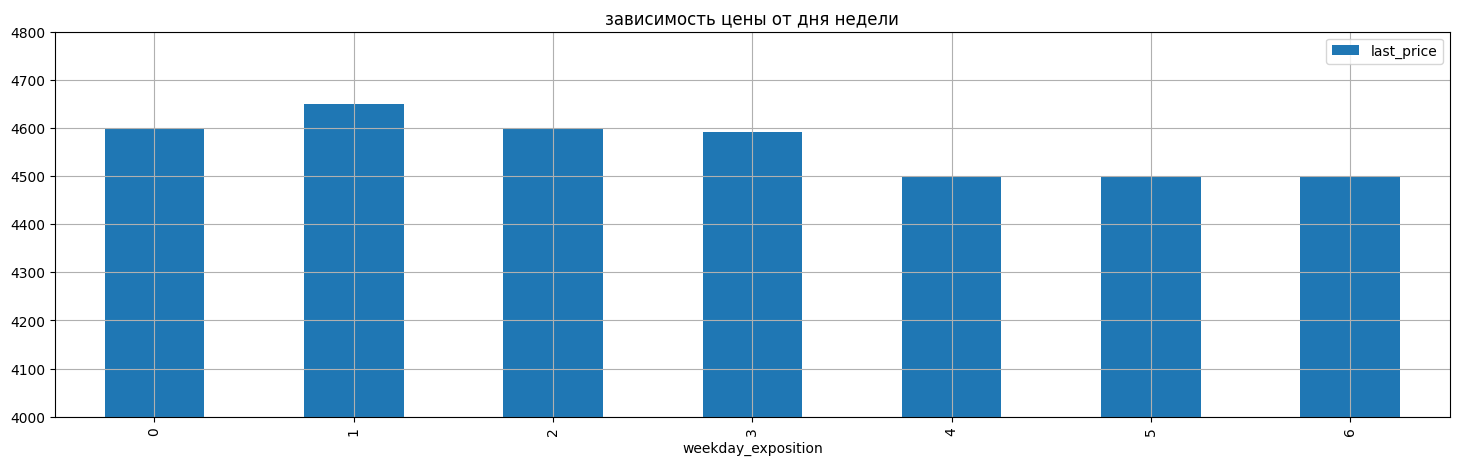

In [115]:
df_weekday.plot(x='weekday_exposition', y="last_price", kind='bar', figsize=(18,5), title='зависимость цены от дня недели', grid=True, ylim=(4000, 4800))

Квартиры выставленные на продажу в конце недели проданы немного дешевле, вторник самый выгодный день для продавца, надо изучить отношение с типом продавца: собственник/риэлтор

<Axes: title={'center': 'зависимость цены от месяца'}, xlabel='month_exposition'>

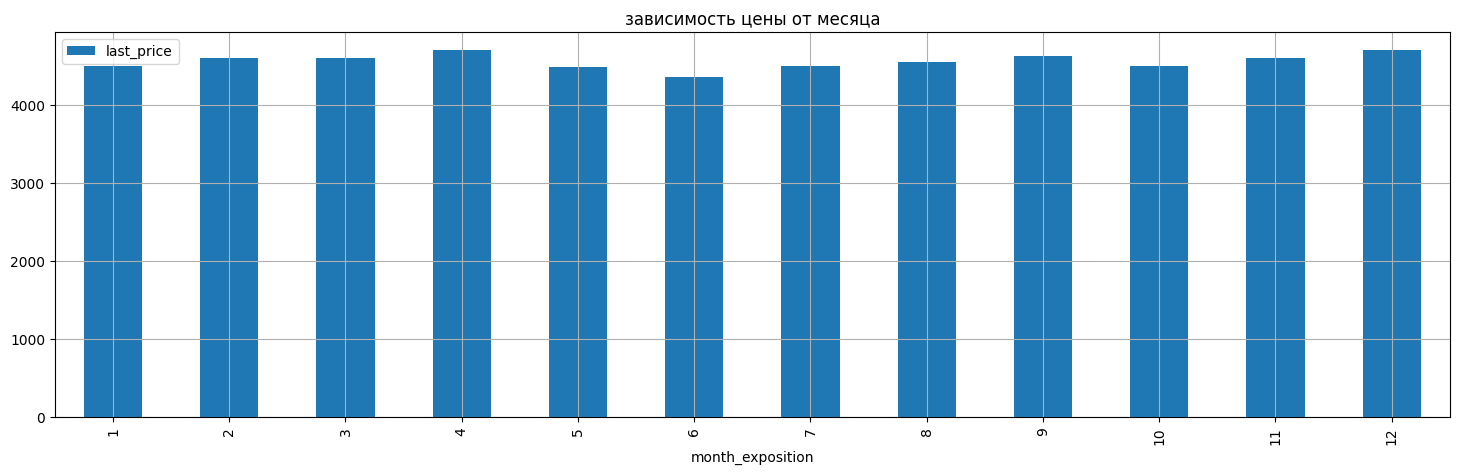

In [116]:
df_month = data.pivot_table(index='month_exposition', values='last_price', aggfunc='median').reset_index()
df_month.plot(x='month_exposition', y="last_price", kind='bar', figsize=(18,5), title='зависимость цены от месяца', grid=True)

Увеличим размеры графика:

<Axes: title={'center': 'зависимость цены от месяца'}, xlabel='month_exposition'>

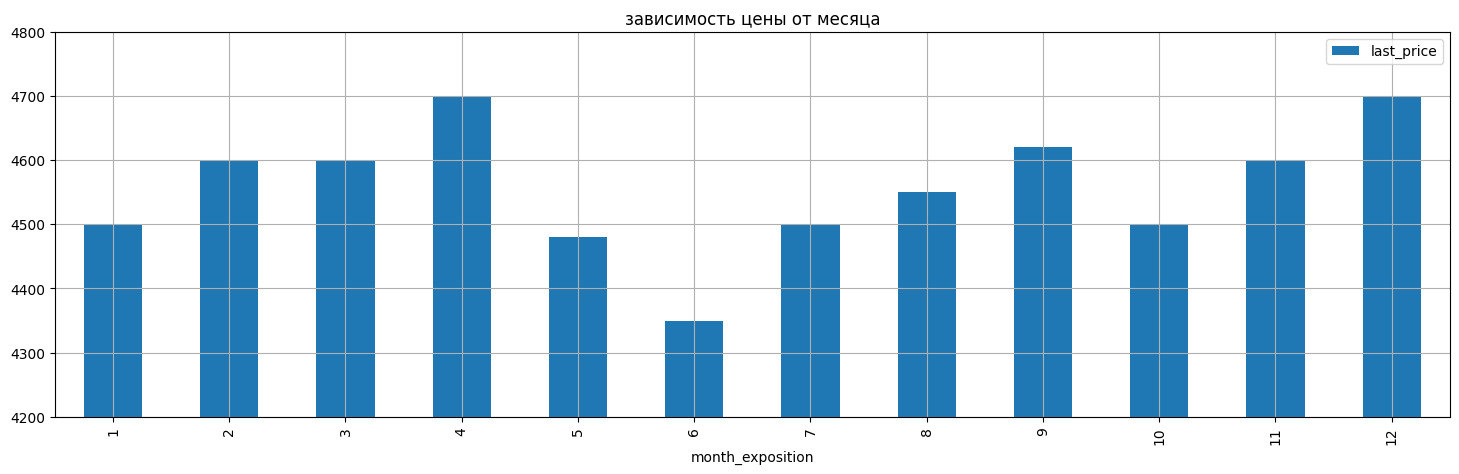

In [117]:
df_month.plot(x='month_exposition', y="last_price", kind='bar', figsize=(18,5), title='зависимость цены от месяца', ylim=(4200, 4800), grid=True)

Цена повышается после спада в январе до апреля, май-июнь спад до 4,35 млн.руб.(минимум), затем нестабильное повышение до конца года до 4,7 млн.руб.

<Axes: title={'center': 'зависимость цены от года'}, xlabel='year_exposition'>

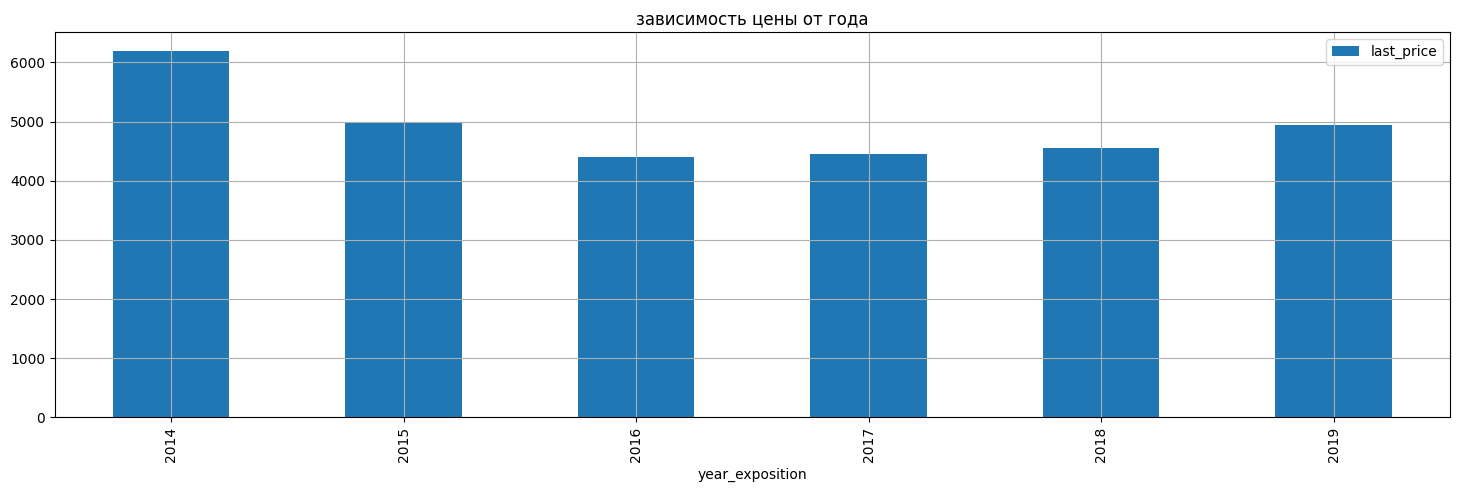

In [118]:
df_year = data.pivot_table(index='year_exposition', values='last_price', aggfunc='median').reset_index()
df_year.plot(x='year_exposition', y="last_price", kind='bar', figsize=(18,5), title='зависимость цены от года', grid=True)

Мы видим быстрое снижение цены до 2016 года, затем медленное востановление рынка до уровня 2015 года

#### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [119]:
city_filtr = (data
 .pivot_table(index='locality_name', values='price_per_square_meter', aggfunc={'mean','count'} )
 .reset_index()
 .sort_values('count', ascending=False)
 .head(10))

In [120]:
city_filtr['mean'] = city_filtr['mean'].round(2)
city_filtr.rename(columns={'mean': 'mean_square_meter'}, inplace=True)
city_filtr.reset_index()

index      locality_name  count  mean_square_meter
0     33    Санкт-Петербург  13101             109.46
1    206     поселок Мурино    423              85.21
2    284     поселок Шушары    389              78.44
3      3         Всеволожск    349              68.85
4     13            Колпино    320              75.20
5     32             Пушкин    316             102.19
6    218  поселок Парголово    288              90.76
7      6            Гатчина    285              68.55
8     76    деревня Кудрово    223              92.50
9     27           Петергоф    186              83.46

In [121]:
city_filtr['mean_square_meter_%'] = city_filtr['mean_square_meter'] / city_filtr['mean_square_meter'].min()

In [122]:
city_filtr.loc[(city_filtr['mean_square_meter'] == city_filtr['mean_square_meter'].max()) | (city_filtr['mean_square_meter'] == city_filtr['mean_square_meter'].min())]

locality_name  count  mean_square_meter  mean_square_meter_%
33  Санкт-Петербург  13101             109.46             1.596791
6           Гатчина    285              68.55             1.000000

Разница в стоимости квадратного метра в топ-10 достигает 60%

#### Вычислим среднюю цену каждого километра от центра в Санкт-Петербурге

In [123]:
piter = data.loc[data['locality_name'] == 'Санкт-Петербург'] \
    .pivot_table(index='cityCenters_nearest_km', values='price_per_square_meter') \
    .reset_index().round(1)

In [124]:
piter.head()

cityCenters_nearest_km  price_per_square_meter
0                       0                   136.6
1                       1                   133.4
2                       2                   127.7
3                       3                   117.1
4                       4                   129.5

<Axes: title={'center': 'зависимость цены от удаленности от центра СП'}, xlabel='cityCenters_nearest_km'>

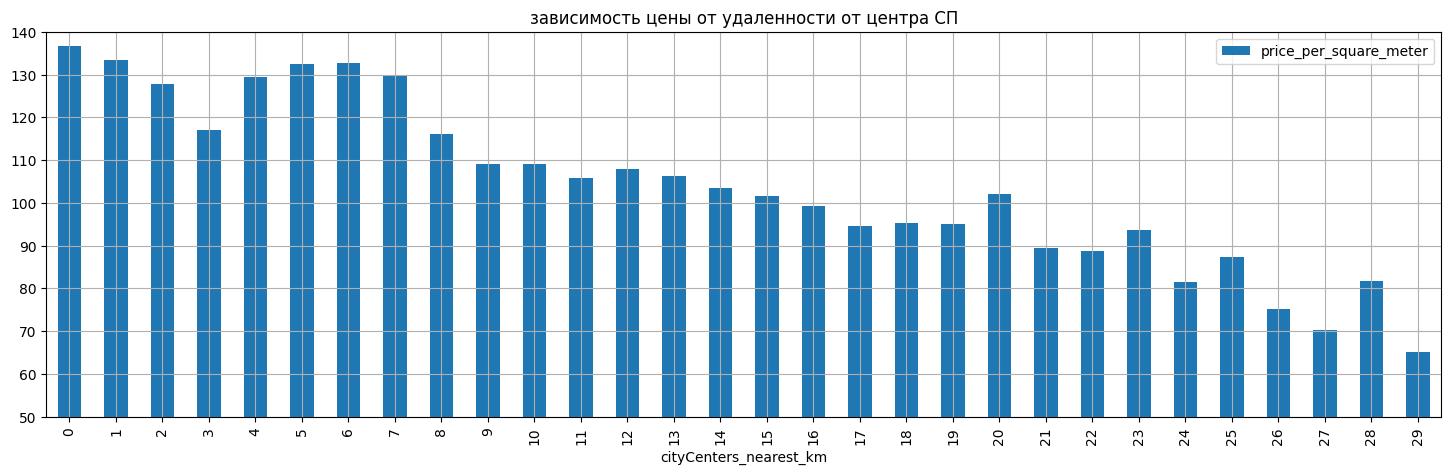

In [125]:
piter.plot(x='cityCenters_nearest_km', y="price_per_square_meter", kind='bar', figsize=(18,5), title='зависимость цены от удаленности от центра СП', ylim=(50, 140), grid=True)

Мы можем выделить Центральный район радиусом 7-8 км, на расстоянии 3 км мы видим спад с 136 до 117 тыс.руб./м2, чтобы выдвинуть гипотезу объясняющую это явление, необходимо более глубокое изучение особенностей города. Начиная с 8-го км идет плавный спад до 65 тыс.руб./м2. с некоторыми аномальными километрами (20, 23, 25, 28), возможно в эти выборки попали элитные пригородные районы.

### Общий вывод

- Цена объектов  растет вместе с общей площадью, жилой площадью, площадью кухни, количеством комнат. Что вполне ожидаемо. Увиденный сильный разброс на графиках говорит о большом влиянии других факторов на цену. 
- Первый этаж самый дешевый, последний немного дороже, остальные этажи самые дорогие
- Квартиры выставленные на продажу в конце недели проданы немного дешевле, вторник самый выгодный день для продавца.
- Цена объектов по дате подачи объявлений повышается после спада в январе до апреля, май-июнь спад до 4,35 млн.руб.(минимум), затем нестабильное повышение до конца года до 4,7 млн.руб.
- Мы видим быстрое снижение цены до 2016 года, затем медленное востановление рынка до уровня 2015 года
- Разница в стоимости квадратного метра между СП и относительно крупными  городами в области достигает 60%
- Мы можем выделить Центральный район СП радиусом 7-8 км, на расстоянии 3 км мы видим спад с 136 до 117 тыс.руб./м2. Начиная с 8-го км идет плавный спад до 65 тыс.руб./м2. с некоторыми аномальными километрами.
- Продажа половины квартир уложилась в три месяца (быстрые продажи), еще одна четверть полгода. Все что продавалось свыше полугода можно считать необычно долгими продажами. Мы видим пики в 7, 30, 45, 60 дней. Вероятно это связано с механизмом автозакрытия объявлений на сайте.